# Initial import and exploring the image dataset

In [1]:
TRAIN_DIR='dataset/train'
VALIDATION_DIR='dataset/valid'
TEST_DIR='dataset/test'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from tensorflow.keras.applications.xception import Xception
import tensorflow.keras.applications
import tensorflow.keras.applications.xception 
import tensorflow.keras.applications.resnet
import tensorflow.keras.applications.vgg16
import tensorflow.keras.applications.inception_v3


In [4]:
from tensorflow.keras.preprocessing.image import load_img

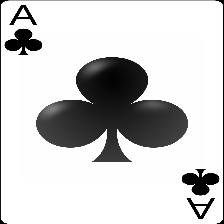

In [5]:
path=TRAIN_DIR
name='ace of clubs/003.jpg'
fullname=f'{path}/{name}'
load_img(fullname)

The properties is 224 X 224 X 3 jpg format

In [14]:
img = load_img(fullname, target_size=(299, 299))

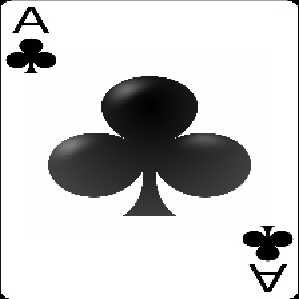

In [15]:
img

In [16]:
x = np.array(img)
x.shape

(299, 299, 3)

In [17]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [18]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [19]:
X = np.array([x])

In [20]:
X = preprocess_input(X)

In [21]:
pred = model.predict(X)

2023-12-19 03:22:39.255506: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-12-19 03:22:39.480300: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 1s 1s/step


2023-12-19 03:22:40.102606: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


In [22]:
decode_predictions(pred)

[[('n03602883', 'joystick', 0.10137536),
  ('n06359193', 'web_site', 0.050469246),
  ('n03314780', 'face_powder', 0.036657695),
  ('n03532672', 'hook', 0.025323061),
  ('n03691459', 'loudspeaker', 0.02434306)]]

## Inital image preparation, making model with Xception

In [11]:

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions


I have tried several agumentaions, but now try without them

Some summary for results is below first fit


In [80]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    # preprocessing_function=preprocess_input
    # rotation_range=15,
    # width_shift_range=0.05,
    # height_shift_range=0.05,
    # shear_range=0.1,
    # zoom_range=0.05,
    # horizontal_flip=True,
    # vertical_flip=True,
    # fill_mode='nearest'                              
                              )

# The properties is 224 X 224 X 3 jpg format

train_ds = train_gen.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    batch_size=32
)

Found 7624 images belonging to 53 classes.


In [81]:
# train_ds.class_indices

In [82]:
val_gen = ImageDataGenerator(
    rescale=1./255,
    # preprocessing_function=preprocess_input
                            )

val_ds = val_gen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(224, 224),
    batch_size=32,
    shuffle=False
)

Found 265 images belonging to 53 classes.


In [83]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False

size_inner=106
droprate=0.03

inputs = keras.Input(shape=(224, 224, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

# inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

# drop = keras.layers.Dropout(droprate)(inner)

outputs = keras.layers.Dense(53)(vectors)

model = keras.Model(inputs, outputs)

In [84]:
learning_rate = 0.0005
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [85]:
history = model.fit(train_ds, epochs=30, validation_data=val_ds)

Epoch 1/30
239/239 [==============================] - 21s 81ms/step - loss: 3.0873 - accuracy: 0.2075 - val_loss: 2.4566 - val_accuracy: 0.3132
Epoch 2/30
239/239 [==============================] - 19s 79ms/step - loss: 2.3202 - accuracy: 0.3952 - val_loss: 2.1441 - val_accuracy: 0.3472
Epoch 3/30
239/239 [==============================] - 19s 80ms/step - loss: 2.0255 - accuracy: 0.4747 - val_loss: 1.9775 - val_accuracy: 0.3849
Epoch 4/30
239/239 [==============================] - 19s 80ms/step - loss: 1.8357 - accuracy: 0.5163 - val_loss: 1.8931 - val_accuracy: 0.3962
Epoch 5/30
239/239 [==============================] - 19s 79ms/step - loss: 1.6895 - accuracy: 0.5710 - val_loss: 1.8181 - val_accuracy: 0.4415
Epoch 6/30
239/239 [==============================] - 19s 80ms/step - loss: 1.5681 - accuracy: 0.6043 - val_loss: 1.7670 - val_accuracy: 0.4755
Epoch 7/30
239/239 [==============================] - 19s 80ms/step - loss: 1.4654 - accuracy: 0.6392 - val_loss: 1.7486 - val_accuracy:

some test values (no good mean no good at all, or no progress after several epochs):
no aug, batch 32, lr=0.05. inner=None, droput=None, epoches=25 = 
*Epoch 21/25
239/239 [==============================] - 19s 80ms/step - loss: 1.5675 - accuracy: 0.8791 - val_loss: 20.3566 - val_accuracy: 0.4755
Epoch 22/25
239/239 [==============================] - 19s 81ms/step - loss: 1.6554 - accuracy: 0.8729 - val_loss: 20.5064 - val_accuracy: 0.4830
Epoch 23/25
239/239 [==============================] - 19s 80ms/step - loss: 1.2304 - accuracy: 0.8973 - val_loss: 20.1082 - val_accuracy: 0.4792
Epoch 24/25
239/239 [==============================] - 19s 80ms/step - loss: 1.3140 - accuracy: 0.8917 - val_loss: 18.4320 - val_accuracy: 0.4453
Epoch 25/25
239/239 [==============================] - 19s 80ms/step - loss: 1.3626 - accuracy: 0.8959 - val_loss: 24.7470 - vay: 0.4113*

no aug, batch 32, lr=0.05. inner=530, droput=None, epoches=25 = *no good*

no aug, batch 32, lr=0.05. inner=106, droput=None, epoches=25 = *no good*

no aug, batch 32, lr=0.1. inner=None, droput=None, epoches=25 =
*Epoch 21/25
239/239 [==============================] - 19s 80ms/step - loss: 3.3343 - accuracy: 0.8713 - val_loss: 43.7658 - val_accuracy: 0.4642
Epoch 22/25
239/239 [==============================] - 19s 80ms/step - loss: 3.0710 - accuracy: 0.8806 - val_loss: 41.2125 - val_accuracy: 0.4642
Epoch 23/25
239/239 [==============================] - 19s 79ms/step - loss: 2.8988 - accuracy: 0.8839 - val_loss: 42.4140 - val_accuracy: 0.4453
Epoch 24/25
239/239 [==============================] - 19s 80ms/step - loss: 2.7108 - accuracy: 0.8915 - val_loss: 46.0503 - val_accuracy: 0.4830
Epoch 25/25
239/239 [==============================] - 19s 80ms/step - loss: 3.0880 - accuracy: 0.8810 - val_loss: 46.0129 - val_accurac*

no aug, batch 32, lr=0.5. inner=None, droput=None, epoches=25 =
*Epoch 20/25
239/239 [==============================] - 19s 79ms/step - loss: 19.1586 - accuracy: 0.8619 - val_loss: 216.3389 - val_accuracy: 0.4226
Epoch 21/25
239/239 [==============================] - 19s 79ms/step - loss: 18.9398 - accuracy: 0.8599 - val_loss: 195.5622 - val_accuracy: 0.4792
Epoch 22/25
239/239 [==============================] - 19s 80ms/step - loss: 16.1795 - accuracy: 0.8754 - val_loss: 214.2110 - val_accuracy: 0.4642
Epoch 23/25
239/239 [==============================] - 19s 80ms/step - loss: 16.3654 - accuracy: 0.8772 - val_loss: 219.8626 - val_accuracy: 0.4642
Epoch 24/25
239/239 [==============================] - 19s 80ms/step - loss: 14.2043 - accuracy: 0.8886 - val_loss: 217.6521 - val_accuracy: 0.4906
Epoch 25/25
239/239 [==============================] - 19s 80ms/step - loss: 15.3243 - accuracy: 0.8848 - val_loss: 206.4328 - val_accuracy: 0.4528*

no aug, batch 32, lr=0.01. inner=None, droput=None, e    *// val_accuracy hit 0.5 in 22 epoch! max==0.536 in epoch 45*poEpoch 44/50
239/239 [==============================] - 19s 81ms/step - loss: 0.1256 - accuracy: 0.9667 - val_loss: 5.8247 - val_accuracy: 0.5132
Epoch 45/50
239/239 [==============================] - 21s 86ms/step - loss: 0.1021 - accuracy: 0.9742 - val_loss: 5.5875 - val_accuracy: 0.5358
Epoch 46/50
239/239 [==============================] - 21s 87ms/step - loss: 0.1292 - accuracy: 0.9718 - val_loss: 5.5880 - val_accuracy: 0.5321
Epoch 47/50
239/239 [==============================] - 20s 83ms/step - loss: 0.0496 - accuracy: 0.9881 - val_loss: 5.7801 - val_accuracy: 0.4943
Epoch 48/50
239/239 [==============================] - 19s 80ms/step - loss: 0.0623 - accuracy: 0.9823 - val_loss: 6.2518 - val_accuracy: 0.4981
Epoch 49/50
239/239 [==============================] - 19s 81ms/step - loss: 0.1790 - accuracy: 0.9576 - val_loss: 6.2307 - val_accuracy: 0.5094
Epoch 50/50
239/239 [==============================] - 21s 88ms/step - loss: 0.1608 - accuracy: 0.9554 - val_loss: 6.8126 - val_accu



no aug, batch 32, lr=0.005. inner=None, droput=None, epoches=30 = 
*Epoch 21/30
239/239 [==============================] - 19s 80ms/step - loss: 0.1118 - accuracy: 0.9751 - val_loss: 2.5226 - val_accuracy: 0.5283
Epoch 22/30
239/239 [==============================] - 19s 80ms/step - loss: 0.1101 - accuracy: 0.9761 - val_loss: 2.3795 - val_accuracy: 0.5321
Epoch 23/30
239/239 [==============================] - 19s 80ms/step - loss: 0.0776 - accuracy: 0.9856 - val_loss: 2.4219 - val_accuracy: 0.5358
Epoch 24/30
239/239 [==============================] - 19s 80ms/step - loss: 0.0707 - accuracy: 0.9853 - val_loss: 2.4632 - val_accuracy: 0.5094
Epoch 25/30
239/239 [==============================] - 19s 80ms/step - loss: 0.0771 - accuracy: 0.9841 - val_loss: 2.6594 - val_accuracy: 0.4943
Epoch 26/30
239/239 [==============================] - 19s 80ms/step - loss: 0.1311 - accuracy: 0.9639 - val_loss: 2.7753 - val_accuracy: 0.5094
Epoch 27/30
239/239 [==============================] - 19s 80ms/step - loss: 0.0881 - accuracy: 0.9782 - val_loss: 2.7172 - val_accuracy: 0.5208
Epoch 28/30
239/239 [==============================] - 19s 80ms/step - loss: 0.0606 - accuracy: 0.9885 - val_loss: 2.5976 - val_accuracy: 0.5698
Epoch 29/30
239/239 [==============================] - 19s 80ms/step - loss: 0.0743 - accuracy: 0.9832 - val_loss: 2.7667 - val_accuracy: 0.5170
Epoch 30/30
239/239 [==============================] - 19s 79ms/step - loss: 0.0570 - accuracy: 0.9877 - val_loss: 2.8256 - v
![download.png](attachment:f0295026-acae-47a8-9c04-0f880081c0bb.png)*

no aug, batch 32, lr=0.001. inner=None, droput=None, epoches=30 = 
*Epoch 23/30
239/239 [==============================] - 19s 80ms/step - loss: 0.3490 - accuracy: 0.9605 - val_loss: 1.6304 - val_accuracy: 0.5283
Epoch 24/30
239/239 [==============================] - 19s 80ms/step - loss: 0.3274 - accuracy: 0.9652 - val_loss: 1.6588 - val_accuracy: 0.5358
Epoch 25/30
239/239 [==============================] - 19s 80ms/step - loss: 0.3061 - accuracy: 0.9689 - val_loss: 1.6486 - val_accuracy: 0.5434
Epoch 26/30
239/239 [==============================] - 19s 80ms/step - loss: 0.2867 - accuracy: 0.9753 - val_loss: 1.6598 - val_accuracy: 0.5358
Epoch 27/30
239/239 [==============================] - 19s 80ms/step - loss: 0.2694 - accuracy: 0.9780 - val_loss: 1.6669 - val_accuracy: 0.5509
Epoch 28/30
239/239 [==============================] - 19s 80ms/step - loss: 0.2523 - accuracy: 0.9786 - val_loss: 1.6867 - val_accuracy: 0.5472
Epoch 29/30
239/239 [==============================] - 19s 80ms/step - loss: 0.2378 - accuracy: 0.9812 - val_loss0.9853 - val_loss: 1.6998 - val_a*
![download.png](attachment:28bd472-5d71-490c-b341-3343b018e494.png)c
  
no aug, batch 32, lr=0.0001. inner=None, droput=None, epoches=30 =  (I stop it)
*Epoch 18/30
239/239 [==============================] - 19s 80ms/step - loss: 1.7545 - accuracy: 0.5776 - val_loss: 1.8884 - val_accuracy: 0.4226
Epoch 19/30
239/239 [==============================] - 19s 81ms/step - loss: 1.7221 - accuracy: 0.5837 - val_loss: 1.8753 - val_accuracy: 0.4113
Epoch 20/30
239/239 [==============================] - 19s 80ms/step - loss: 1.6905 - accuracy: 0.5929 - val_loss: 1.8534 - val_accuracy: 0.4226
Epoch 21/30
239/239 [==============================] - 19s 80ms/step - loss: 1.6608 - accuracy: 0.6017 - val_loss: 1.8418 - val_accuracy:* 0.4340


no aug, batch 32, 0r=0.000
*239/239 [==============================] - 21s 87ms/step - loss: 0.7417 - accuracy: 0.8608 - val_loss: 1.6006 - val_accuracy: 0.5358
Epoch 22/30
239/239 [==============================] - 21s 86ms/step - loss: 0.7108 - accuracy: 0.8692 - val_loss: 1.5981 - val_accuracy: 0.5396
Epoch 23/30
239/239 [==============================] - 21s 86ms/step - loss: 0.6818 - accuracy: 0.8795 - val_loss: 1.6012 - val_accuracy: 0.5283
Epoch 24/30
239/239 [==============================] - 21s 86ms/step - loss: 0.6548 - accuracy: 0.8864 - val_loss: 1.6000 - val_accuracy: 0.5245
Epoch 25/30
239/239 [==============================] - 21s 87ms/step - loss: 0.6295 - accuracy: 0.8940 - val_loss: 1.6016 - val_accuracy: 0.5472
Epoch 26/30
239/239 [==============================] - 21s 87ms/step - loss: 0.6027 - accuracy: 0.9008 - val_loss: 1.5822 - val_accuracy: 0.5509
Epoch 27/30
239/239 [==============================] - 21s 87ms/step - loss: 0.5794 - accuracy: 0.9081 - val_loss: 1.5730 - val_accuracy: 0.5396
Epoch 28/30
239/239 [==============================] - 21s 86ms/step - loss: 0.5566 - accuracy: 0.9157 - val_loss: 1.5942 - val_accuracy: 0.5509
Epoch 29/30
239/239 [==============================] - 21s 86ms/step - loss: 0.5346 - accuracy: 0.9206 - val_loss: 1.5932 - val_accuracy: 0.5358
Epoch 30/30
239/239 [==============================] - 21s 86ms/step - loss: 0.5137 - accuracy: 0.9251 - val_loss: 1.5942 - va*
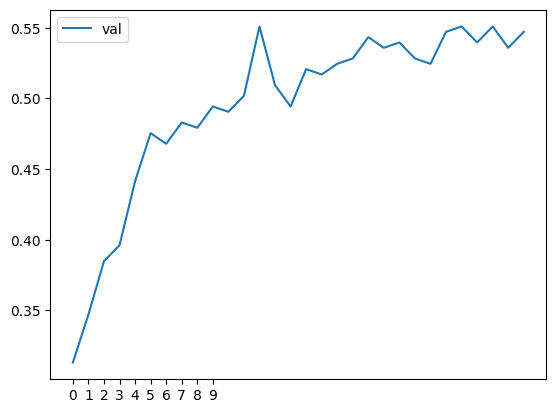l_accuracy: 0.5472
5.6ches=50 =
**
y: 0.4642l_accuracy: 0.4113

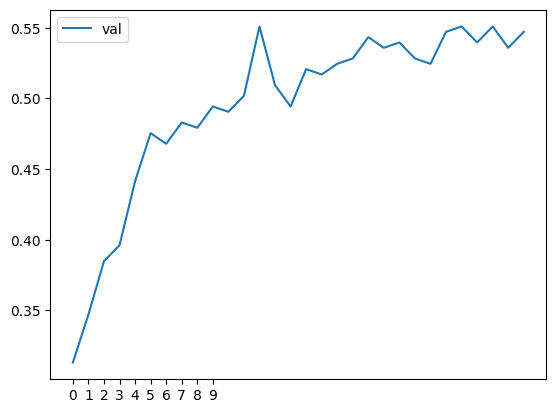

In [87]:
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## Conclusion

Best results was with learning rate 0.001, 
but they are still not inspiring

Let's try adding inner layer with different sizes, and try dropout


### Helper functions

In [88]:
def make_datasets(batch_size=32,):
    train_gen = ImageDataGenerator(
    rescale=1./255,
    # preprocessing_function=preprocess_input
    # rotation_range=15,
    # width_shift_range=0.05,
    # height_shift_range=0.05,
    # shear_range=0.1,
    # zoom_range=0.05,
    # horizontal_flip=True,
    # vertical_flip=True,
    # fill_mode='nearest'                              
                              )
    # The properties is 224 X 224 X 3 jpg format

    train_ds = train_gen.flow_from_directory(
        TRAIN_DIR,
        target_size=(224, 224),
        batch_size=batch_size
    )
    val_gen = ImageDataGenerator(
        rescale=1./255,
        # preprocessing_function=preprocess_input
                                )
    
    val_ds = val_gen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(224, 224),
        batch_size=batch_size,
        shuffle=False
    )
    return train_ds, val_ds



In [89]:
def make_model_Xception(learning_rate, size_inner=None, droprate=None, ):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )
    
    base_model.trainable = False
     
    inputs = keras.Input(shape=(224, 224, 3))
    
    base = base_model(inputs, training=False)
    
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    if droprate is not None and size_inner is not None:
        inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
        drop = keras.layers.Dropout(droprate)(inner)
        outputs = keras.layers.Dense(53)(drop)
    elif size_inner is not None:
        inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
        outputs = keras.layers.Dense(53)(inner)     
    elif droprate is not None:
        drop = keras.layers.Dropout(droprate)(vectors)
        outputs = keras.layers.Dense(53)(drop) 
    else:
        outputs = keras.layers.Dense(53)(vectors) 
    
    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model
    

## Adding inner layer

In [90]:
train_ds, val_ds= make_datasets(batch_size=32,)

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


In [ ]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model_Xception(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

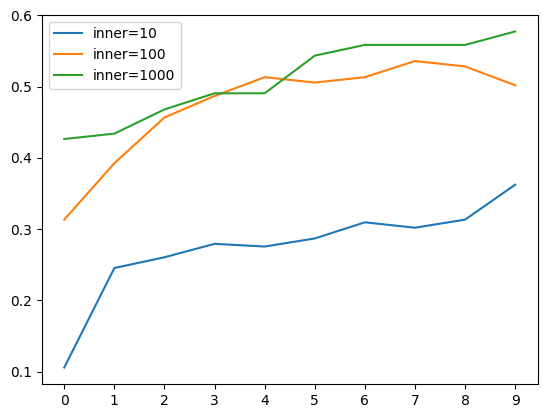

In [93]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('inner=%s' % size))

plt.xticks(np.arange(10))
plt.legend()

### Conclusion:
100 and 1000 is better, lets add 500 and more epoches


In [94]:
learning_rate = 0.001

scores = {}

for size in [100, 500, 1000]:
    print(size)

    model = make_model_Xception(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=20, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

100
Epoch 1/20
239/239 [==============================] - 23s 90ms/step - loss: 2.8967 - accuracy: 0.2244 - val_loss: 2.1074 - val_accuracy: 0.3358
Epoch 2/20
239/239 [==============================] - 21s 89ms/step - loss: 2.0239 - accuracy: 0.4196 - val_loss: 1.8980 - val_accuracy: 0.3774
Epoch 3/20
239/239 [==============================] - 21s 88ms/step - loss: 1.6926 - accuracy: 0.5148 - val_loss: 1.7062 - val_accuracy: 0.4566
Epoch 4/20
239/239 [==============================] - 21s 89ms/step - loss: 1.4672 - accuracy: 0.5750 - val_loss: 1.7093 - val_accuracy: 0.5019
Epoch 5/20
239/239 [==============================] - 22s 90ms/step - loss: 1.2897 - accuracy: 0.6306 - val_loss: 1.6424 - val_accuracy: 0.4830
Epoch 6/20
239/239 [==============================] - 22s 91ms/step - loss: 1.1386 - accuracy: 0.6756 - val_loss: 1.5846 - val_accuracy: 0.5057
Epoch 7/20
239/239 [==============================] - 21s 90ms/step - loss: 1.0014 - accuracy: 0.7177 - val_loss: 1.5464 - val_accur

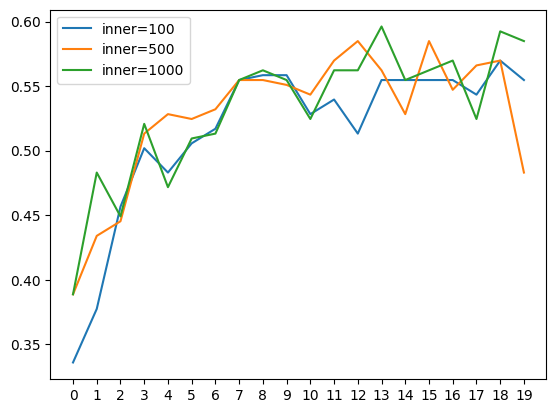

In [95]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('inner=%s' % size))

plt.xticks(np.arange(20))
plt.legend()

#so inner size = 1000 is best

## Adding dropout

In [96]:
learning_rate = 0.001
size = 1000

scores = {}

for droprate in [0.0, 0.1, 0.2, 0.5]:
    print(droprate)

    model = make_model_Xception(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
239/239 [==============================] - 22s 85ms/step - loss: 2.5581 - accuracy: 0.2833 - val_loss: 1.8599 - val_accuracy: 0.3736
Epoch 2/30
239/239 [==============================] - 20s 84ms/step - loss: 1.7141 - accuracy: 0.4828 - val_loss: 1.7048 - val_accuracy: 0.4528
Epoch 3/30
239/239 [==============================] - 20s 84ms/step - loss: 1.3221 - accuracy: 0.6022 - val_loss: 1.6801 - val_accuracy: 0.4566
Epoch 4/30
239/239 [==============================] - 20s 86ms/step - loss: 1.0127 - accuracy: 0.6876 - val_loss: 1.5753 - val_accuracy: 0.5170
Epoch 5/30
239/239 [==============================] - 21s 88ms/step - loss: 0.7537 - accuracy: 0.7753 - val_loss: 1.7486 - val_accuracy: 0.4981
Epoch 6/30
239/239 [==============================] - 21s 89ms/step - loss: 0.5613 - accuracy: 0.8343 - val_loss: 1.6954 - val_accuracy: 0.5170
Epoch 7/30
239/239 [==============================] - 21s 86ms/step - loss: 0.4076 - accuracy: 0.8902 - val_loss: 1.7667 - val_accur

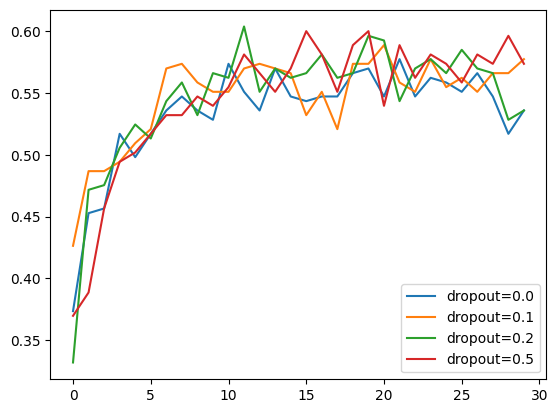

In [97]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('dropout=%s' % droprate))

# plt.ylim(0.78, 0.86)
plt.legend()

##Conclusions

looks like 0.2 and 0.5 are better then 0.0 but still it is very poor model

# Agumentaion

In [98]:
learning_rate = 0.001
size = 1000
droprate = 0.2

# model = make_model_Xception(learning_rate=learning_rate, size_inner=size)


In [100]:
def make_datasets_aug(batch_size=32, 
                    rotation_range=0,
                    width_shift_range=0,
                    height_shift_range=0,
                    shear_range=0,
                    zoom_range=0,
                    horizontal_flip=False,
                    vertical_flip=False
            ):
    train_gen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=rotation_range,
                width_shift_range=width_shift_range,
                height_shift_range=height_shift_range,
                shear_range=shear_range,
                zoom_range=zoom_range,
                horizontal_flip=horizontal_flip,
                vertical_flip=vertical_flip,
                fill_mode='nearest'                              
                              )
    # The properties is 224 X 224 X 3 jpg format

    train_ds = train_gen.flow_from_directory(
        TRAIN_DIR,
        target_size=(224, 224),
        batch_size=batch_size
    )
    val_gen = ImageDataGenerator(
        rescale=1./255,
        # preprocessing_function=preprocess_input
                                )
    
    val_ds = val_gen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(224, 224),
        batch_size=batch_size,
        shuffle=False
    )
    return train_ds, val_ds

In [101]:
aug_numerical_small_vals=[0,0.01,0.05,0.1,0.2,0.3]

### Rotation

In [104]:
scores = {}

for rotation_range in [0,5,10,20,30,50]:
    print(rotation_range)

    train_ds, val_ds= make_datasets_aug(batch_size=32,rotation_range=rotation_range)
    
    model = make_model_Xception(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=20, validation_data=val_ds)
    scores[rotation_range] = history.history

    print()
    print()

0
Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/20
239/239 [==============================] - 22s 86ms/step - loss: 2.6533 - accuracy: 0.2630 - val_loss: 1.9549 - val_accuracy: 0.3434
Epoch 2/20
239/239 [==============================] - 20s 85ms/step - loss: 1.8569 - accuracy: 0.4441 - val_loss: 1.7090 - val_accuracy: 0.4415
Epoch 3/20
239/239 [==============================] - 20s 82ms/step - loss: 1.5068 - accuracy: 0.5435 - val_loss: 1.6591 - val_accuracy: 0.4830
Epoch 4/20
239/239 [==============================] - 20s 82ms/step - loss: 1.2272 - accuracy: 0.6192 - val_loss: 1.5842 - val_accuracy: 0.4868
Epoch 5/20
239/239 [==============================] - 20s 82ms/step - loss: 0.9998 - accuracy: 0.6923 - val_loss: 1.5928 - val_accuracy: 0.5094
Epoch 6/20
239/239 [==============================] - 20s 82ms/step - loss: 0.7983 - accuracy: 0.7522 - val_loss: 1.5709 - val_accuracy: 0.5019
Epoch 7/20
239/239 [=============================

In [109]:
scores

{}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


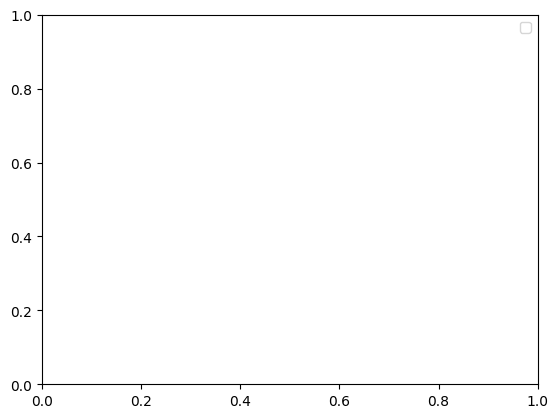

In [107]:
for rotation_range, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('rotation_range=%s' % rotation_range))


plt.legend()

**sorry something went wrong and here there is no graph,**

but from the output there can be clearly seen that rotation_range=10 is best, and gives val_acc=0.6

rotation_range=10


## Shift

In [111]:
learning_rate = 0.001
size = 1000
droprate = 0.2

In [112]:
scores = {}

for shift in [0,0.01,0.05,0.1,0.2,0.3]:
    print(shift)

    train_ds, val_ds= make_datasets_aug(batch_size=32, width_shift_range=shift,
                height_shift_range=shift,)
    
    model = make_model_Xception(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=20, validation_data=val_ds)
    scores[shift] = history.history

    print()
    print()

0
Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/20
239/239 [==============================] - 22s 85ms/step - loss: 2.6749 - accuracy: 0.2568 - val_loss: 1.9407 - val_accuracy: 0.3660
Epoch 2/20
239/239 [==============================] - 20s 83ms/step - loss: 1.8830 - accuracy: 0.4389 - val_loss: 1.6968 - val_accuracy: 0.4679
Epoch 3/20
239/239 [==============================] - 20s 83ms/step - loss: 1.5354 - accuracy: 0.5307 - val_loss: 1.6747 - val_accuracy: 0.4340
Epoch 4/20
239/239 [==============================] - 20s 83ms/step - loss: 1.2601 - accuracy: 0.6146 - val_loss: 1.5925 - val_accuracy: 0.4943
Epoch 5/20
239/239 [==============================] - 20s 82ms/step - loss: 1.0205 - accuracy: 0.6864 - val_loss: 1.6041 - val_accuracy: 0.5245
Epoch 6/20
239/239 [==============================] - 20s 83ms/step - loss: 0.8346 - accuracy: 0.7416 - val_loss: 1.5346 - val_accuracy: 0.5509
Epoch 7/20
239/239 [=============================

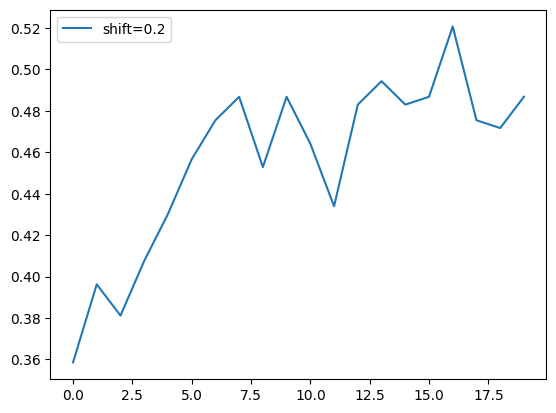

In [113]:
for shift, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('shift=%s' % shift))


plt.legend()

**sorry no plot**

shift=0.05 
or shift=0
gives better result


but i have found bugs in using Xception

I used rescale=1./255, and it was wrong!
but I should used
 preprocessing_function=preprocess_input,  (pixel should be from -1 to 1 )

 now I will test next augmentation with corrected make_dataset_aug func.

In [117]:
def make_datasets_aug(batch_size=32, 
                    rotation_range=0,
                    width_shift_range=0,
                    height_shift_range=0,
                    shear_range=0,
                    zoom_range=0,
                    horizontal_flip=False,
                    vertical_flip=False
            ):
    train_gen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
                # rescale=1./255,
                rotation_range=rotation_range,
                width_shift_range=width_shift_range,
                height_shift_range=height_shift_range,
                shear_range=shear_range,
                zoom_range=zoom_range,
                horizontal_flip=horizontal_flip,
                vertical_flip=vertical_flip,
                fill_mode='nearest'                              
                              )
    # The properties is 224 X 224 X 3 jpg format

    train_ds = train_gen.flow_from_directory(
        TRAIN_DIR,
        target_size=(224, 224),
        batch_size=batch_size
    )
    val_gen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        # rescale=1./255,

                                )
    
    val_ds = val_gen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(224, 224),
        batch_size=batch_size,
        shuffle=False
    )
    return train_ds, val_ds

### shear_range


In [118]:
scores = {}

for shear_range in [0,0.05,0.1,0.25]:
    print(shear_range)

    train_ds, val_ds= make_datasets_aug(batch_size=32, shear_range=shear_range,)
    
    model = make_model_Xception(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=20, validation_data=val_ds)
    scores[shear_range] = history.history

    print()
    print()

0
Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/20
239/239 [==============================] - 21s 83ms/step - loss: 2.6723 - accuracy: 0.2488 - val_loss: 1.8945 - val_accuracy: 0.4189
Epoch 2/20
239/239 [==============================] - 20s 83ms/step - loss: 1.8802 - accuracy: 0.4352 - val_loss: 1.7582 - val_accuracy: 0.4113
Epoch 3/20
239/239 [==============================] - 20s 85ms/step - loss: 1.5156 - accuracy: 0.5400 - val_loss: 1.6774 - val_accuracy: 0.4604
Epoch 4/20
239/239 [==============================] - 20s 82ms/step - loss: 1.2458 - accuracy: 0.6116 - val_loss: 1.5776 - val_accuracy: 0.5245
Epoch 5/20
239/239 [==============================] - 20s 82ms/step - loss: 1.0129 - accuracy: 0.6891 - val_loss: 1.5743 - val_accuracy: 0.5396
Epoch 6/20
239/239 [==============================] - 20s 82ms/step - loss: 0.8233 - accuracy: 0.7402 - val_loss: 1.6459 - val_accuracy: 0.5472
Epoch 7/20
239/239 [=============================

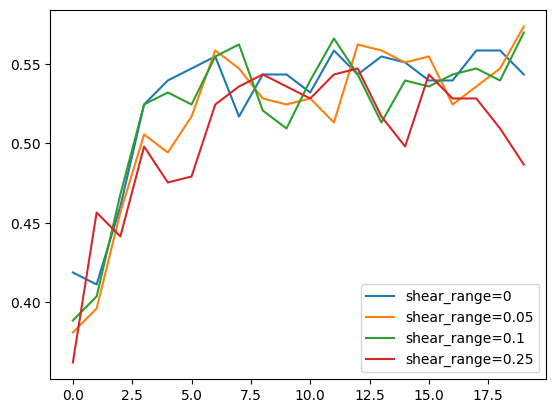

In [119]:
for shear_range, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('shear_range=%s' % shear_range))


plt.legend()

Conclusion

shear_range =0.1



### Zoom

In [120]:
scores = {}

for zoom_range in [0,0.01,0.05,0.1,0.2,0.3]:
    print(zoom_range)

    train_ds, val_ds= make_datasets_aug(batch_size=32, zoom_range=zoom_range)
    
    model = make_model_Xception(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=20, validation_data=val_ds)
    scores[zoom_range] = history.history

    print()
    print()

0
Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/20
239/239 [==============================] - 22s 84ms/step - loss: 2.6941 - accuracy: 0.2455 - val_loss: 1.8599 - val_accuracy: 0.4075
Epoch 2/20
239/239 [==============================] - 20s 82ms/step - loss: 1.8852 - accuracy: 0.4298 - val_loss: 1.7833 - val_accuracy: 0.4189
Epoch 3/20
239/239 [==============================] - 20s 82ms/step - loss: 1.5316 - accuracy: 0.5290 - val_loss: 1.6035 - val_accuracy: 0.4528
Epoch 4/20
239/239 [==============================] - 20s 82ms/step - loss: 1.2586 - accuracy: 0.6141 - val_loss: 1.6125 - val_accuracy: 0.4868
Epoch 5/20
239/239 [==============================] - 20s 82ms/step - loss: 1.0373 - accuracy: 0.6780 - val_loss: 1.6047 - val_accuracy: 0.4906
Epoch 6/20
239/239 [==============================] - 20s 82ms/step - loss: 0.8307 - accuracy: 0.7461 - val_loss: 1.6351 - val_accuracy: 0.5208
Epoch 7/20
239/239 [=============================

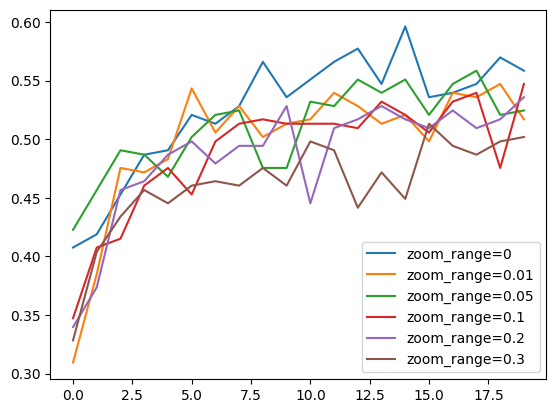

In [121]:
for zoom_range, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('zoom_range=%s' % zoom_range))


plt.legend()

Conclusion

zoom=0


### horizontal_flip

In [122]:
scores = {}

for horizontal_flip in [False, True]:
    print(horizontal_flip)

    train_ds, val_ds= make_datasets_aug(batch_size=32, horizontal_flip=horizontal_flip,)
    
    model = make_model_Xception(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=15, validation_data=val_ds)
    scores[horizontal_flip] = history.history

    print()
    print()

False
Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/15
239/239 [==============================] - 24s 84ms/step - loss: 2.6834 - accuracy: 0.2470 - val_loss: 1.9398 - val_accuracy: 0.3736
Epoch 2/15
239/239 [==============================] - 20s 82ms/step - loss: 1.8917 - accuracy: 0.4321 - val_loss: 1.6808 - val_accuracy: 0.4189
Epoch 3/15
239/239 [==============================] - 20s 82ms/step - loss: 1.5341 - accuracy: 0.5279 - val_loss: 1.6172 - val_accuracy: 0.4943
Epoch 4/15
239/239 [==============================] - 20s 82ms/step - loss: 1.2519 - accuracy: 0.6121 - val_loss: 1.6420 - val_accuracy: 0.4604
Epoch 5/15
239/239 [==============================] - 20s 82ms/step - loss: 1.0208 - accuracy: 0.6814 - val_loss: 1.6107 - val_accuracy: 0.4868
Epoch 6/15
239/239 [==============================] - 20s 83ms/step - loss: 0.8237 - accuracy: 0.7411 - val_loss: 1.5765 - val_accuracy: 0.5434
Epoch 7/15
239/239 [=========================

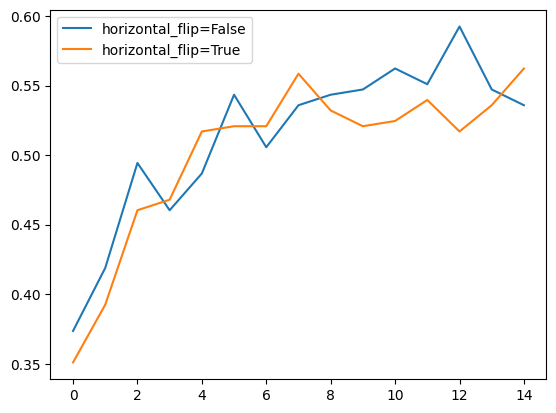

In [123]:
for horizontal_flip, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('horizontal_flip=%s' % horizontal_flip))


plt.legend()

conclusion
horizontal_flip=False

### vertical_flip

In [124]:
scores = {}

for vertical_flip in [False, True]:
    print(vertical_flip)

    train_ds, val_ds= make_datasets_aug(batch_size=32, vertical_flip=vertical_flip,)
    
    model = make_model_Xception(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=15, validation_data=val_ds)
    scores[vertical_flip] = history.history

    print()
    print()

False
Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/15
239/239 [==============================] - 22s 84ms/step - loss: 2.6956 - accuracy: 0.2533 - val_loss: 1.9434 - val_accuracy: 0.3849
Epoch 2/15
239/239 [==============================] - 19s 80ms/step - loss: 1.8768 - accuracy: 0.4387 - val_loss: 1.8561 - val_accuracy: 0.3736
Epoch 3/15
239/239 [==============================] - 19s 80ms/step - loss: 1.5388 - accuracy: 0.5287 - val_loss: 1.5718 - val_accuracy: 0.5358
Epoch 4/15
239/239 [==============================] - 19s 80ms/step - loss: 1.2463 - accuracy: 0.6139 - val_loss: 1.5345 - val_accuracy: 0.5396
Epoch 5/15
239/239 [==============================] - 19s 80ms/step - loss: 1.0221 - accuracy: 0.6849 - val_loss: 1.5290 - val_accuracy: 0.5170
Epoch 6/15
239/239 [==============================] - 19s 80ms/step - loss: 0.8274 - accuracy: 0.7434 - val_loss: 1.6222 - val_accuracy: 0.5057
Epoch 7/15
239/239 [=========================

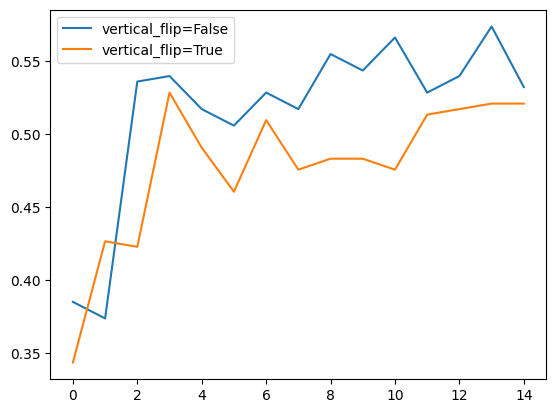

In [125]:
for vertical_flip, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('vertical_flip=%s' % vertical_flip))


plt.legend()

Conclusion


vertical_flip=True


Now we got this

rotation_range=10,
width_shift_range=0.05,
height_shift_range=0.05,
shear_range=0.1,
zoom_range=0,
horizontal_flip=False
vertical_flip=True


### batch_size

lets vary batch size with all this things for 20 epochs

In [128]:
scores = {}

for batch_size in [8,16,24,32,48]:
    print(batch_size)
    train_ds, val_ds= make_datasets_aug(batch_size=batch_size, 
                        rotation_range=10,
                        width_shift_range=0.05,
                        height_shift_range=0.05,
                        shear_range=0.1,
                        zoom_range=0,
                        horizontal_flip=False,
                        vertical_flip=True)    
    model = make_model_Xception(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=20, validation_data=val_ds)
    scores[batch_size] = history.history

    print()
    print()


8
Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/20
953/953 [==============================] - 40s 40ms/step - loss: 2.7149 - accuracy: 0.2219 - val_loss: 2.0305 - val_accuracy: 0.3358
Epoch 2/20
953/953 [==============================] - 36s 38ms/step - loss: 2.1128 - accuracy: 0.3522 - val_loss: 1.7815 - val_accuracy: 0.3962
Epoch 3/20
953/953 [==============================] - 38s 40ms/step - loss: 1.8796 - accuracy: 0.4151 - val_loss: 1.7162 - val_accuracy: 0.4302
Epoch 4/20
953/953 [==============================] - 37s 39ms/step - loss: 1.7360 - accuracy: 0.4562 - val_loss: 1.6800 - val_accuracy: 0.4566
Epoch 5/20
953/953 [==============================] - 37s 39ms/step - loss: 1.6022 - accuracy: 0.4898 - val_loss: 1.7254 - val_accuracy: 0.4340
Epoch 6/20
953/953 [==============================] - 37s 39ms/step - loss: 1.4929 - accuracy: 0.5203 - val_loss: 1.5651 - val_accuracy: 0.4981
Epoch 7/20
953/953 [=============================

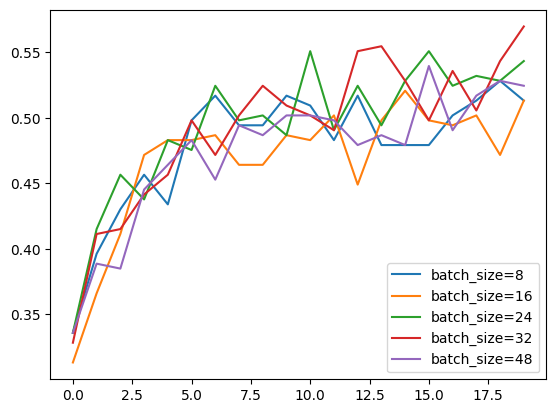

In [131]:
for batch_size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('batch_size=%s' % batch_size))


plt.legend()

Still 32 is best batch size!

# Pretrained model Comparing



xception vs resnet5 vs vgg16 vs inception

v3

It seems now for me, I should compare this different pre-trained in the early stages. But I got some better hyperparams for xception, and I will use them to compare models

In [9]:
# This is copy of function I have used before, with added functions for selectiong pre-trained model

def make_datasets_aug_preprocess_func(preprocess_func,
                                      batch_size=32, 
                                    rotation_range=0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    shear_range=0,
                                    zoom_range=0,
                                    horizontal_flip=False,
                                    vertical_flip=False, ):
    train_gen = ImageDataGenerator(
                preprocessing_function=preprocess_func,
                rotation_range=rotation_range,
                width_shift_range=width_shift_range,
                height_shift_range=height_shift_range,
                shear_range=shear_range,
                zoom_range=zoom_range,
                horizontal_flip=horizontal_flip,
                vertical_flip=vertical_flip,
                fill_mode='nearest'                              
                              )
    # The properties is 224 X 224 X 3 jpg format

    train_ds = train_gen.flow_from_directory(
        TRAIN_DIR,
        target_size=(224, 224),
        batch_size=batch_size
    )
    val_gen = ImageDataGenerator(
        preprocessing_function=preprocess_func,)
                                
    val_ds = val_gen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(224, 224),
        batch_size=batch_size,
        shuffle=False
    )
    return train_ds, val_ds


def make_model_with_base(base_model,learning_rate, size_inner=None, droprate=None):
    
    base_model.trainable = False
     
    inputs = keras.Input(shape=(224, 224, 3))
    
    base = base_model(inputs, training=False)
    
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    if droprate is not None and size_inner is not None:
        inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
        drop = keras.layers.Dropout(droprate)(inner)
        outputs = keras.layers.Dense(53)(drop)
    elif size_inner is not None:
        inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
        outputs = keras.layers.Dense(53)(inner)     
    elif droprate is not None:
        drop = keras.layers.Dropout(droprate)(vectors)
        outputs = keras.layers.Dense(53)(drop) 
    else:
        outputs = keras.layers.Dense(53)(vectors) 
    
    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model





In [10]:
base_model_Xception = keras.applications.xception.Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model_Resnet50 = keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model_VGG16 = keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model_InceptionV3 = keras.applications.InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

preprocess_function_Xception=keras.applications.xception.preprocess_input
preprocess_function_ResNet50=keras.applications.resnet.preprocess_input
preprocess_function_VGG16=keras.applications.vgg16.preprocess_input
preprocess_function_InceptionV3=keras.applications.inception_v3.preprocess_input




In [143]:
learning_rate = 0.001
size = 1000
droprate = 0.2
epochs=20

scores = {}

pre_trained_dict={
    'xception':[base_model_Xception,preprocess_function_Xception],
    'ResNet50':[base_model_Resnet50,preprocess_function_ResNet50],
    'VGG16':[base_model_VGG16,preprocess_function_VGG16],
    'InceptionV3':[base_model_InceptionV3,preprocess_function_InceptionV3],
}

for pre_trained in pre_trained_dict.keys():
    print(pre_trained)
    train_ds, val_ds= make_datasets_aug_preprocess_func(
                        preprocess_func=pre_trained_dict[pre_trained][1],
                        batch_size=32, 
                        rotation_range=10,
                        width_shift_range=0.05,
                        height_shift_range=0.05,
                        shear_range=0.1,
                        zoom_range=0,
                        horizontal_flip=False,
                        vertical_flip=True,
     )    
    
    model = make_model_with_base(
        base_model=pre_trained_dict[pre_trained][0],
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)
    scores[pre_trained] = history.history

    print()
    print()



xception
Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/20
239/239 [==============================] - 37s 146ms/step - loss: 2.7700 - accuracy: 0.2293 - val_loss: 2.1137 - val_accuracy: 0.3245
Epoch 2/20
239/239 [==============================] - 34s 142ms/step - loss: 2.0874 - accuracy: 0.3732 - val_loss: 1.8298 - val_accuracy: 0.4038
Epoch 3/20
239/239 [==============================] - 34s 143ms/step - loss: 1.8304 - accuracy: 0.4401 - val_loss: 1.7848 - val_accuracy: 0.3887
Epoch 4/20
239/239 [==============================] - 34s 141ms/step - loss: 1.6551 - accuracy: 0.4933 - val_loss: 1.6642 - val_accuracy: 0.4679
Epoch 5/20
239/239 [==============================] - 34s 142ms/step - loss: 1.5088 - accuracy: 0.5283 - val_loss: 1.6799 - val_accuracy: 0.4868
Epoch 6/20
239/239 [==============================] - 34s 143ms/step - loss: 1.3936 - accuracy: 0.5661 - val_loss: 1.6971 - val_accuracy: 0.4755
Epoch 7/20
239/239 [================

2023-12-20 14:03:13.361309: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 408.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-12-20 14:03:13.361417: W tensorflow/core/kernels/gpu_utils.cc:54] Failed to allocate memory for convolution redzone checking; skipping this check. This is benign and only means that we won't check cudnn for out-of-bounds reads and writes. This message will only be printed once.
2023-12-20 14:03:13.364476: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 408.14MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-12-20 14:03:13.379517: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out

239/239 [==============================] - 36s 143ms/step - loss: 3.1052 - accuracy: 0.2577 - val_loss: 2.0035 - val_accuracy: 0.3736
Epoch 2/20
239/239 [==============================] - 34s 141ms/step - loss: 1.8671 - accuracy: 0.4509 - val_loss: 1.8050 - val_accuracy: 0.4604
Epoch 3/20
239/239 [==============================] - 33s 140ms/step - loss: 1.5213 - accuracy: 0.5422 - val_loss: 1.8062 - val_accuracy: 0.4415
Epoch 4/20
239/239 [==============================] - 34s 141ms/step - loss: 1.3002 - accuracy: 0.6062 - val_loss: 1.6021 - val_accuracy: 0.5094
Epoch 5/20
239/239 [==============================] - 34s 142ms/step - loss: 1.1397 - accuracy: 0.6477 - val_loss: 1.5697 - val_accuracy: 0.5472
Epoch 6/20
239/239 [==============================] - 34s 142ms/step - loss: 0.9993 - accuracy: 0.6912 - val_loss: 1.4514 - val_accuracy: 0.5887
Epoch 7/20
239/239 [==============================] - 34s 141ms/step - loss: 0.9099 - accuracy: 0.7100 - val_loss: 1.6927 - val_accuracy: 0.5

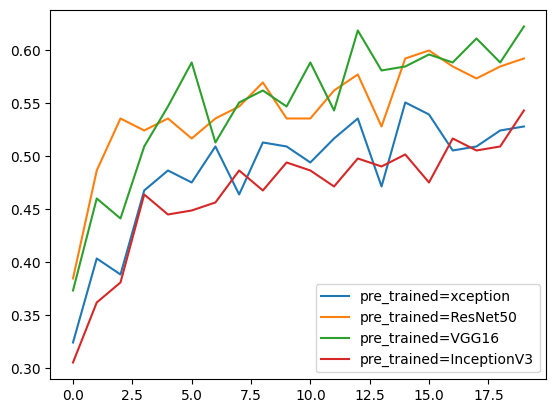

In [144]:
for pre_trained, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('pre_trained=%s' % pre_trained))


plt.legend()

The best is VGG16

Now for VGG16

## Retuning parametrs

As I have approximate values, i will try to alter them near the value I have

In [11]:
## functions to use here

In [16]:
# This is copy of function I have used before, with added functions for selectiong pre-trained model

def make_datasets_aug_preprocess_func(preprocess_func,
                                      batch_size=32, 
                                    rotation_range=0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    shear_range=0,
                                    zoom_range=0,
                                    horizontal_flip=False,
                                    vertical_flip=False, ):
    train_gen = ImageDataGenerator(
                preprocessing_function=preprocess_func,
                rotation_range=rotation_range,
                width_shift_range=width_shift_range,
                height_shift_range=height_shift_range,
                shear_range=shear_range,
                zoom_range=zoom_range,
                horizontal_flip=horizontal_flip,
                vertical_flip=vertical_flip,
                fill_mode='nearest'                              
                              )
    # The properties is 224 X 224 X 3 jpg format

    train_ds = train_gen.flow_from_directory(
        TRAIN_DIR,
        target_size=(224, 224),
        batch_size=batch_size
    )
    val_gen = ImageDataGenerator(
        preprocessing_function=preprocess_func,)
                                
    val_ds = val_gen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(224, 224),
        batch_size=batch_size,
        shuffle=False
    )
    return train_ds, val_ds

def make_datasets_preprocess_func(preprocess_func,
                                      batch_size=32,  ):
    train_gen = ImageDataGenerator(
                preprocessing_function=preprocess_func,                              
                              )
    # The properties is 224 X 224 X 3 jpg format

    train_ds = train_gen.flow_from_directory(
        TRAIN_DIR,
        target_size=(224, 224),
        batch_size=batch_size
    )
    val_gen = ImageDataGenerator(
        preprocessing_function=preprocess_func,)
                                
    val_ds = val_gen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(224, 224),
        batch_size=batch_size,
        shuffle=False
    )
    return train_ds, val_ds


def make_model_with_base(base_model,learning_rate, size_inner=None, droprate=None):
    
    base_model.trainable = False
     
    inputs = keras.Input(shape=(224, 224, 3))
    
    base = base_model(inputs, training=False)
    
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    if droprate is not None and size_inner is not None:
        inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
        drop = keras.layers.Dropout(droprate)(inner)
        outputs = keras.layers.Dense(53)(drop)
    elif size_inner is not None:
        inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
        outputs = keras.layers.Dense(53)(inner)     
    elif droprate is not None:
        drop = keras.layers.Dropout(droprate)(vectors)
        outputs = keras.layers.Dense(53)(drop) 
    else:
        outputs = keras.layers.Dense(53)(vectors) 
    
    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model






for LR, inner and dropout lets try without augmentation

In [17]:
learning_rate = 0.001
size = 1000
droprate = 0.2
epochs=15

batch_size=32, 
rotation_range=10,
width_shift_range=0.05,
height_shift_range=0.05,
shear_range=0.1,
zoom_range=0,
horizontal_flip=False,
vertical_flip=True

preprocess_func=keras.applications.vgg16.preprocess_input
base_model=keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

scores = {}

for learning_rate_vars in [ 0.001, 0.0005, 0.0001]:
    print(learning_rate_vars)
    train_ds, val_ds= make_datasets_preprocess_func(
                        preprocess_func=preprocess_func,
    )    
    # train_ds, val_ds= make_datasets_aug_preprocess_func(
    #                     preprocess_func=preprocess_func,
    #                     batch_size=32, 
    #                     rotation_range=10,
    #                     width_shift_range=0.05,
    #                     height_shift_range=0.05,
    #                     shear_range=0.1,
    #                     zoom_range=0,
    #                     horizontal_flip=False,
    #                     vertical_flip=True,
    # )    
    model = make_model_with_base(
        base_model=base_model,
        learning_rate=learning_rate_vars,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)
    scores[learning_rate_vars] = history.history   

    
    print()
    print()


0.005
Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/10
239/239 [==============================] - 24s 97ms/step - loss: 3.3394 - accuracy: 0.2196 - val_loss: 2.1094 - val_accuracy: 0.3358
Epoch 2/10
239/239 [==============================] - 23s 97ms/step - loss: 2.1639 - accuracy: 0.3639 - val_loss: 1.8458 - val_accuracy: 0.4113
Epoch 3/10
239/239 [==============================] - 23s 97ms/step - loss: 1.9958 - accuracy: 0.4077 - val_loss: 1.9412 - val_accuracy: 0.4377
Epoch 4/10
239/239 [==============================] - 23s 97ms/step - loss: 1.8378 - accuracy: 0.4568 - val_loss: 1.8761 - val_accuracy: 0.3962
Epoch 5/10
239/239 [==============================] - 23s 97ms/step - loss: 1.7649 - accuracy: 0.4725 - val_loss: 1.6217 - val_accuracy: 0.4906
Epoch 6/10
239/239 [==============================] - 23s 97ms/step - loss: 1.6509 - accuracy: 0.4997 - val_loss: 1.7219 - val_accuracy: 0.4830
Epoch 7/10
239/239 [=========================

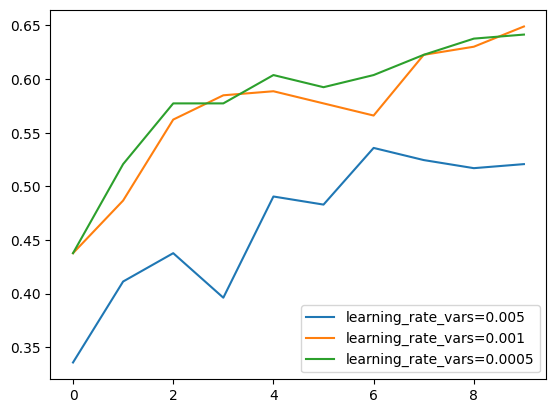

In [18]:
for learning_rate_vars, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('learning_rate_vars=%s' % learning_rate_vars))


plt.legend()

ok, now explore more

In [20]:
learning_rate = 0.001
size = 1000
droprate = 0.2
epochs=20

batch_size=32, 
rotation_range=10,
width_shift_range=0.05,
height_shift_range=0.05,
shear_range=0.1,
zoom_range=0,
horizontal_flip=False,
vertical_flip=True

preprocess_func=keras.applications.vgg16.preprocess_input
base_model=keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

scores = {}

for learning_rate_vars in [0.001, 0.0005, 0.0001]:
    print(learning_rate_vars)
    train_ds, val_ds= make_datasets_preprocess_func(
                        preprocess_func=preprocess_func,
    )    
    # train_ds, val_ds= make_datasets_aug_preprocess_func(
    #                     preprocess_func=preprocess_func,
    #                     batch_size=32, 
    #                     rotation_range=10,
    #                     width_shift_range=0.05,
    #                     height_shift_range=0.05,
    #                     shear_range=0.1,
    #                     zoom_range=0,
    #                     horizontal_flip=False,
    #                     vertical_flip=True,
    # )    
    model = make_model_with_base(
        base_model=base_model,
        learning_rate=learning_rate_vars,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)
    scores[learning_rate_vars] = history.history   

    
    print()
    print()

0.001
Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/20
239/239 [==============================] - 24s 97ms/step - loss: 3.0550 - accuracy: 0.2761 - val_loss: 1.7785 - val_accuracy: 0.4642
Epoch 2/20
239/239 [==============================] - 23s 97ms/step - loss: 1.6671 - accuracy: 0.5140 - val_loss: 1.5638 - val_accuracy: 0.5321
Epoch 3/20
239/239 [==============================] - 23s 97ms/step - loss: 1.2178 - accuracy: 0.6355 - val_loss: 1.5506 - val_accuracy: 0.5321
Epoch 4/20
239/239 [==============================] - 23s 97ms/step - loss: 0.9098 - accuracy: 0.7209 - val_loss: 1.4268 - val_accuracy: 0.5774
Epoch 5/20
239/239 [==============================] - 23s 97ms/step - loss: 0.7034 - accuracy: 0.7852 - val_loss: 1.5907 - val_accuracy: 0.5811
Epoch 6/20
239/239 [==============================] - 23s 97ms/step - loss: 0.5618 - accuracy: 0.8283 - val_loss: 1.4444 - val_accuracy: 0.6226
Epoch 7/20
239/239 [=========================

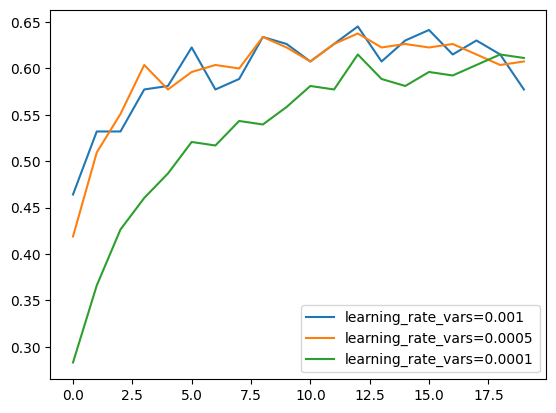

In [21]:
for learning_rate_vars, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('learning_rate_vars=%s' % learning_rate_vars))


plt.legend()

so 
learning_rate = 0.001
now vary size

In [31]:
learning_rate = 0.001
size = 1000
droprate = 0.0 ### zero
epochs=10

batch_size=32, 
rotation_range=10,
width_shift_range=0.05,
height_shift_range=0.05,
shear_range=0.1,
zoom_range=0,
horizontal_flip=False,
vertical_flip=True

preprocess_func=keras.applications.vgg16.preprocess_input
base_model=keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

scores = {}

for size_vars in [None, 250, 1000, 2000]:
    print(size_vars)
    train_ds, val_ds= make_datasets_preprocess_func(
                        preprocess_func=preprocess_func,
    )    
    # train_ds, val_ds= make_datasets_aug_preprocess_func(
    #                     preprocess_func=preprocess_func,
    #                     batch_size=32, 
    #                     rotation_range=10,
    #                     width_shift_range=0.05,
    #                     height_shift_range=0.05,
    #                     shear_range=0.1,
    #                     zoom_range=0,
    #                     horizontal_flip=False,
    #                     vertical_flip=True,
    # )    
    model = make_model_with_base(
        base_model=base_model,
        learning_rate=learning_rate,
        size_inner=size_vars,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)
    scores[size_vars if size_vars is not None else 0] = history.history   

    
    print()
    print()

None
Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/10
239/239 [==============================] - 24s 98ms/step - loss: 5.4136 - accuracy: 0.1427 - val_loss: 3.5527 - val_accuracy: 0.2528
Epoch 2/10
239/239 [==============================] - 23s 96ms/step - loss: 2.7261 - accuracy: 0.3649 - val_loss: 2.5070 - val_accuracy: 0.4000
Epoch 3/10
239/239 [==============================] - 23s 97ms/step - loss: 1.9711 - accuracy: 0.4871 - val_loss: 2.1307 - val_accuracy: 0.4415
Epoch 4/10
239/239 [==============================] - 23s 97ms/step - loss: 1.5335 - accuracy: 0.5803 - val_loss: 1.9458 - val_accuracy: 0.5019
Epoch 5/10
239/239 [==============================] - 23s 98ms/step - loss: 1.2537 - accuracy: 0.6431 - val_loss: 1.7817 - val_accuracy: 0.5283
Epoch 6/10
239/239 [==============================] - 23s 97ms/step - loss: 1.0768 - accuracy: 0.6936 - val_loss: 1.7357 - val_accuracy: 0.5698
Epoch 7/10
239/239 [==========================

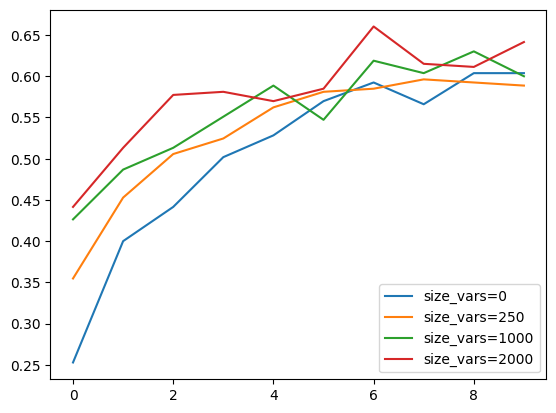

In [32]:
for size_vars, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('size_vars=%s' % size_vars))


plt.legend()

Thas interesting

Let's keep the result for 2000 and add 1500 and 3000

In [33]:
save_res=scores[2000]


In [35]:
save_res

{'loss': [2.7927825450897217,
  1.3862340450286865,
  0.9208205342292786,
  0.6182500720024109,
  0.46354177594184875,
  0.3442009389400482,
  0.2521284818649292,
  0.2621546983718872,
  0.2519412338733673,
  0.20035238564014435],
 'accuracy': [0.3269937038421631,
  0.5914218425750732,
  0.7240293622016907,
  0.8153200149536133,
  0.8625393509864807,
  0.9004459381103516,
  0.9304826855659485,
  0.9245802760124207,
  0.9314008355140686,
  0.947140634059906],
 'val_loss': [1.6900839805603027,
  1.728843092918396,
  1.6042274236679077,
  1.6843429803848267,
  1.858290433883667,
  1.851102590560913,
  1.5629040002822876,
  1.8347320556640625,
  1.817281723022461,
  1.905631184577942],
 'val_accuracy': [0.4415094256401062,
  0.5132075548171997,
  0.5773584842681885,
  0.5811320543289185,
  0.5698113441467285,
  0.5849056839942932,
  0.6603773832321167,
  0.6150943636894226,
  0.6113207340240479,
  0.6415094137191772]}

In [36]:
learning_rate = 0.001
size = 1000
droprate = 0.0 ### zero
epochs=10

batch_size=32, 
rotation_range=10,
width_shift_range=0.05,
height_shift_range=0.05,
shear_range=0.1,
zoom_range=0,
horizontal_flip=False,
vertical_flip=True

preprocess_func=keras.applications.vgg16.preprocess_input
base_model=keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

scores = {}

for size_vars in [1500, 2000, 3000]:
    if size_vars==2000:
        scores[2000]=save_res
    else:        
        print(size_vars)
        train_ds, val_ds= make_datasets_preprocess_func(
                            preprocess_func=preprocess_func,
        )    
        # train_ds, val_ds= make_datasets_aug_preprocess_func(
        #                     preprocess_func=preprocess_func,
        #                     batch_size=32, 
        #                     rotation_range=10,
        #                     width_shift_range=0.05,
        #                     height_shift_range=0.05,
        #                     shear_range=0.1,
        #                     zoom_range=0,
        #                     horizontal_flip=False,
        #                     vertical_flip=True,
        # )    
        model = make_model_with_base(
            base_model=base_model,
            learning_rate=learning_rate,
            size_inner=size_vars,
            droprate=droprate
        )
    
        history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)
        scores[size_vars if size_vars is not None else 0] = history.history   
    
        
        print()
        print()

1500
Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/10
239/239 [==============================] - 26s 105ms/step - loss: 2.8127 - accuracy: 0.3173 - val_loss: 1.8925 - val_accuracy: 0.4528
Epoch 2/10
239/239 [==============================] - 25s 103ms/step - loss: 1.3765 - accuracy: 0.5943 - val_loss: 1.7147 - val_accuracy: 0.5321
Epoch 3/10
239/239 [==============================] - 25s 104ms/step - loss: 0.9163 - accuracy: 0.7251 - val_loss: 1.5058 - val_accuracy: 0.5962
Epoch 4/10
239/239 [==============================] - 25s 104ms/step - loss: 0.6046 - accuracy: 0.8221 - val_loss: 1.7924 - val_accuracy: 0.5396
Epoch 5/10
239/239 [==============================] - 25s 104ms/step - loss: 0.4454 - accuracy: 0.8658 - val_loss: 1.6044 - val_accuracy: 0.6151
Epoch 6/10
239/239 [==============================] - 25s 104ms/step - loss: 0.3009 - accuracy: 0.9150 - val_loss: 1.5751 - val_accuracy: 0.6226
Epoch 7/10
239/239 [====================

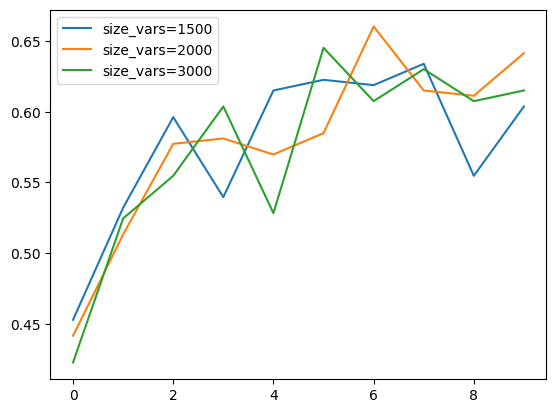

In [37]:
for size_vars, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('size_vars=%s' % size_vars))


plt.legend()

ok, so best will be 2000
b

In [39]:
old_score=scores[2000]

In [40]:
old_score

{'loss': [2.7927825450897217,
  1.3862340450286865,
  0.9208205342292786,
  0.6182500720024109,
  0.46354177594184875,
  0.3442009389400482,
  0.2521284818649292,
  0.2621546983718872,
  0.2519412338733673,
  0.20035238564014435],
 'accuracy': [0.3269937038421631,
  0.5914218425750732,
  0.7240293622016907,
  0.8153200149536133,
  0.8625393509864807,
  0.9004459381103516,
  0.9304826855659485,
  0.9245802760124207,
  0.9314008355140686,
  0.947140634059906],
 'val_loss': [1.6900839805603027,
  1.728843092918396,
  1.6042274236679077,
  1.6843429803848267,
  1.858290433883667,
  1.851102590560913,
  1.5629040002822876,
  1.8347320556640625,
  1.817281723022461,
  1.905631184577942],
 'val_accuracy': [0.4415094256401062,
  0.5132075548171997,
  0.5773584842681885,
  0.5811320543289185,
  0.5698113441467285,
  0.5849056839942932,
  0.6603773832321167,
  0.6150943636894226,
  0.6113207340240479,
  0.6415094137191772]}

In [41]:
learning_rate = 0.001
size = 2000
droprate = 0.0 ### zero
epochs=10

batch_size=32, 
rotation_range=10,
width_shift_range=0.05,
height_shift_range=0.05,
shear_range=0.1,
zoom_range=0,
horizontal_flip=False,
vertical_flip=True

preprocess_func=keras.applications.vgg16.preprocess_input
base_model=keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

scores = {}

for droprate_vars in [0.0, 0.1, 0.2,0.3,0.4,0.5]:
    if droprate_vars==0.0:
        scores[0.0]=old_score
    else:        
        print(droprate_vars)
        train_ds, val_ds= make_datasets_preprocess_func(
                            preprocess_func=preprocess_func,
        )    
        # train_ds, val_ds= make_datasets_aug_preprocess_func(
        #                     preprocess_func=preprocess_func,
        #                     batch_size=32, 
        #                     rotation_range=10,
        #                     width_shift_range=0.05,
        #                     height_shift_range=0.05,
        #                     shear_range=0.1,
        #                     zoom_range=0,
        #                     horizontal_flip=False,
        #                     vertical_flip=True,
        # )    
        model = make_model_with_base(
            base_model=base_model,
            learning_rate=learning_rate,
            size_inner=size,
            droprate=droprate_vars
        )
    
        history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)
        scores[droprate_vars] = history.history   
    
        
        print()
        print()

0.1
Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/10
239/239 [==============================] - 26s 104ms/step - loss: 2.8471 - accuracy: 0.3158 - val_loss: 1.6897 - val_accuracy: 0.5057
Epoch 2/10
239/239 [==============================] - 25s 106ms/step - loss: 1.4627 - accuracy: 0.5678 - val_loss: 1.5001 - val_accuracy: 0.5585
Epoch 3/10
239/239 [==============================] - 25s 106ms/step - loss: 1.0419 - accuracy: 0.6877 - val_loss: 1.7701 - val_accuracy: 0.5396
Epoch 4/10
239/239 [==============================] - 25s 105ms/step - loss: 0.7165 - accuracy: 0.7834 - val_loss: 1.6304 - val_accuracy: 0.5585
Epoch 5/10
239/239 [==============================] - 25s 105ms/step - loss: 0.5514 - accuracy: 0.8291 - val_loss: 1.6651 - val_accuracy: 0.6038
Epoch 6/10
239/239 [==============================] - 25s 104ms/step - loss: 0.4265 - accuracy: 0.8760 - val_loss: 1.6869 - val_accuracy: 0.6226
Epoch 7/10
239/239 [=====================

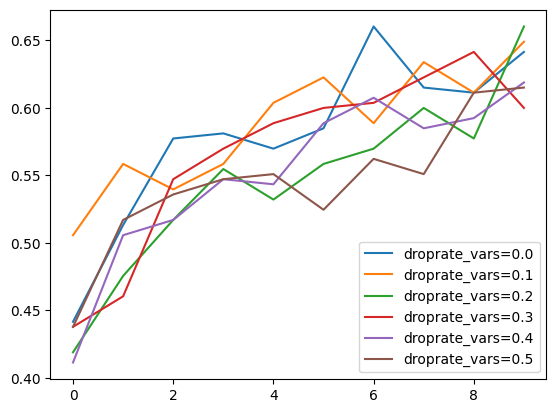

In [42]:
for droprate_vars, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('droprate_vars=%s' % droprate_vars))


plt.legend()

In [43]:
learning_rate = 0.001
size = 2000
droprate = 0.0 ### zero
epochs=25

batch_size=32, 
rotation_range=10,
width_shift_range=0.05,
height_shift_range=0.05,
shear_range=0.1,
zoom_range=0,
horizontal_flip=False,
vertical_flip=True

preprocess_func=keras.applications.vgg16.preprocess_input
base_model=keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

scores = {}

for droprate_vars in [0.0, 0.2]:   
    print(droprate_vars)
    train_ds, val_ds= make_datasets_preprocess_func(
                        preprocess_func=preprocess_func,
    )    
    # train_ds, val_ds= make_datasets_aug_preprocess_func(
    #                     preprocess_func=preprocess_func,
    #                     batch_size=32, 
    #                     rotation_range=10,
    #                     width_shift_range=0.05,
    #                     height_shift_range=0.05,
    #                     shear_range=0.1,
    #                     zoom_range=0,
    #                     horizontal_flip=False,
    #                     vertical_flip=True,
    # )    
    model = make_model_with_base(
        base_model=base_model,
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate_vars
    )

    history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)
    scores[droprate_vars] = history.history   

    
    print()
    print()

0.0
Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/25
239/239 [==============================] - 25s 101ms/step - loss: 2.8188 - accuracy: 0.3216 - val_loss: 1.7175 - val_accuracy: 0.4868
Epoch 2/25
239/239 [==============================] - 24s 101ms/step - loss: 1.3725 - accuracy: 0.5900 - val_loss: 1.5561 - val_accuracy: 0.5660
Epoch 3/25
239/239 [==============================] - 24s 100ms/step - loss: 0.9133 - accuracy: 0.7268 - val_loss: 1.4640 - val_accuracy: 0.5698
Epoch 4/25
239/239 [==============================] - 24s 100ms/step - loss: 0.6336 - accuracy: 0.8089 - val_loss: 1.6506 - val_accuracy: 0.6075
Epoch 5/25
239/239 [==============================] - 24s 101ms/step - loss: 0.4553 - accuracy: 0.8648 - val_loss: 1.6059 - val_accuracy: 0.5962
Epoch 6/25
239/239 [==============================] - 24s 100ms/step - loss: 0.3499 - accuracy: 0.8982 - val_loss: 1.7739 - val_accuracy: 0.5774
Epoch 7/25
239/239 [=====================

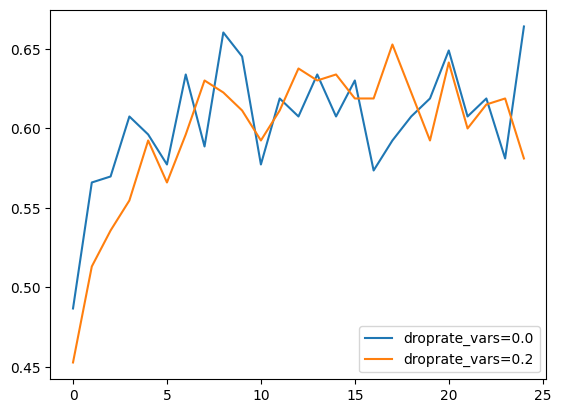

In [44]:
for droprate_vars, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('droprate_vars=%s' % droprate_vars))


plt.legend()

Not satified with result at all!!

Thy changing the structure of the model



In [47]:
##Change some pooling

def make_model_max_pooling_with_base(base_model,learning_rate, size_inner=None, droprate=None):
    
    base_model.trainable = False
     
    inputs = keras.Input(shape=(224, 224, 3))
    
    base = base_model(inputs, training=False)
    
    vectors = keras.layers.GlobalMaxPooling2D()(base)

    if droprate is not None and size_inner is not None:
        inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
        drop = keras.layers.Dropout(droprate)(inner)
        outputs = keras.layers.Dense(53)(drop)
    elif size_inner is not None:
        inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
        outputs = keras.layers.Dense(53)(inner)     
    elif droprate is not None:
        drop = keras.layers.Dropout(droprate)(vectors)
        outputs = keras.layers.Dense(53)(drop) 
    else:
        outputs = keras.layers.Dense(53)(vectors) 
    
    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model





In [48]:
learning_rate = 0.001
size = 2000
droprate = 0.0 
epochs=15

batch_size=32, 
rotation_range=10,
width_shift_range=0.05,
height_shift_range=0.05,
shear_range=0.1,
zoom_range=0,
horizontal_flip=False,
vertical_flip=True

preprocess_func=keras.applications.vgg16.preprocess_input
base_model=keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

train_ds, val_ds= make_datasets_preprocess_func(
                    preprocess_func=preprocess_func,
)    
    # train_ds, val_ds= make_datasets_aug_preprocess_func(
    #                     preprocess_func=preprocess_func,
    #                     batch_size=32, 
    #                     rotation_range=10,
    #                     width_shift_range=0.05,
    #                     height_shift_range=0.05,
    #                     shear_range=0.1,
    #                     zoom_range=0,
    #                     horizontal_flip=False,
    #                     vertical_flip=True,
    # )    
model = make_model_max_pooling_with_base(
    base_model=base_model,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate_vars
)

history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)


Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/15
239/239 [==============================] - 24s 98ms/step - loss: 8.1947 - accuracy: 0.2029 - val_loss: 2.1279 - val_accuracy: 0.3660
Epoch 2/15
239/239 [==============================] - 23s 97ms/step - loss: 2.1618 - accuracy: 0.4099 - val_loss: 1.7670 - val_accuracy: 0.4906
Epoch 3/15
239/239 [==============================] - 23s 97ms/step - loss: 1.7576 - accuracy: 0.5025 - val_loss: 1.5493 - val_accuracy: 0.5132
Epoch 4/15
239/239 [==============================] - 23s 98ms/step - loss: 1.5158 - accuracy: 0.5630 - val_loss: 1.8344 - val_accuracy: 0.4906
Epoch 5/15
239/239 [==============================] - 24s 99ms/step - loss: 1.3551 - accuracy: 0.6056 - val_loss: 1.6211 - val_accuracy: 0.5358
Epoch 6/15
239/239 [==============================] - 24s 102ms/step - loss: 1.2156 - accuracy: 0.6401 - val_loss: 1.7240 - val_accuracy: 0.5434
Epoch 7/15
239/239 [==============================

In [ ]:
plt.plot(history['val_accuracy'], label=(''))


plt.legend()

In [54]:
from tensorflow.keras import regularizers

In [55]:
## searching net I found that I can try EfficientNetB3 for my case

def make_model2_with_base(base_model,learning_rate, size_inner=None, droprate=None):
    
    base_model.trainable = False
     
    inputs = keras.Input(shape=(224, 224, 3))
    
    base = base_model(inputs, training=False)
    
    normalisation=keras.layers.BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001)(base)  #suggested
    
    if droprate is not None and size_inner is not None:
        inner = keras.layers.Dense(size_inner, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation='relu')(normalisation)
        # sorry this is a copy paste. I see them somwhere as an example and don't understant completely. Lets see how they work
        
        drop = keras.layers.Dropout(droprate)(inner)
        outputs = keras.layers.Dense(53, activation= 'softmax')(drop)
    elif size_inner is not None:
        inner = keras.layers.Dense(size_inner, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation='relu')(normalisation)
        outputs = keras.layers.Dense(53, activation= 'softmax')(inner)     
    elif droprate is not None:
        drop = keras.layers.Dropout(droprate)(normalisation)
        outputs = keras.layers.Dense(53, activation= 'softmax')(drop) 
    else:
        outputs = keras.layers.Dense(53, activation= 'softmax')(normalisation) 
    
    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adamax(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy()

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model




In [56]:
learning_rate = 0.001
size = 256
droprate = 0.45 ### zero
epochs=10

batch_size=32, 
rotation_range=10,
width_shift_range=0.05,
height_shift_range=0.05,
shear_range=0.1,
zoom_range=0,
horizontal_flip=False,
vertical_flip=True

base_model_efficientnet = tf.keras.applications.efficientnet.EfficientNetB3(include_top= False, 
                                                               weights= "imagenet", 
                                                               input_shape= (224,224,3), 
                                                               pooling= 'max',
                                                               # pooling= None
                                                                           )

preprocessing_efficientnet= tf.keras.applications.efficientnet.preprocess_input

train_ds, val_ds= make_datasets_preprocess_func(
                    preprocess_func=preprocessing_efficientnet,
)    
# train_ds, val_ds= make_datasets_aug_preprocess_func(
#                     preprocess_func=preprocess_func,
#                     batch_size=32, 
#                     rotation_range=10,
#                     width_shift_range=0.05,
#                     height_shift_range=0.05,
#                     shear_range=0.1,
#                     zoom_range=0,
#                     horizontal_flip=False,
#                     vertical_flip=True,
# )    
model = make_model2_with_base(
    base_model=base_model_efficientnet,
    learning_rate=learning_rate,
    size_inner=size_vars,
    droprate=droprate
)

history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)



Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/10
239/239 [==============================] - 26s 90ms/step - loss: 23.4129 - accuracy: 0.3315 - val_loss: 12.4036 - val_accuracy: 0.3811
Epoch 2/10
239/239 [==============================] - 20s 86ms/step - loss: 8.0480 - accuracy: 0.5759 - val_loss: 5.6098 - val_accuracy: 0.4604
Epoch 3/10
239/239 [==============================] - 21s 86ms/step - loss: 4.4988 - accuracy: 0.5824 - val_loss: 3.9767 - val_accuracy: 0.4717
Epoch 4/10
239/239 [==============================] - 21s 86ms/step - loss: 3.6109 - accuracy: 0.5799 - val_loss: 3.4876 - val_accuracy: 0.5019
Epoch 5/10
239/239 [==============================] - 21s 87ms/step - loss: 3.3059 - accuracy: 0.5927 - val_loss: 3.2647 - val_accuracy: 0.5396
Epoch 6/10
239/239 [==============================] - 21s 86ms/step - loss: 3.1299 - accuracy: 0.6104 - val_loss: 3.1420 - val_accuracy: 0.5170
Epoch 7/10
239/239 [=============================

In [57]:
history = history+model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/10
239/239 [==============================] - 21s 86ms/step - loss: 2.6169 - accuracy: 0.6853 - val_loss: 2.7862 - val_accuracy: 0.5396
Epoch 2/10
239/239 [==============================] - 21s 86ms/step - loss: 2.5421 - accuracy: 0.6992 - val_loss: 2.7383 - val_accuracy: 0.5736
Epoch 3/10
239/239 [==============================] - 21s 87ms/step - loss: 2.4668 - accuracy: 0.7211 - val_loss: 2.6917 - val_accuracy: 0.6000
Epoch 4/10
239/239 [==============================] - 21s 87ms/step - loss: 2.4193 - accuracy: 0.7219 - val_loss: 2.6446 - val_accuracy: 0.6113
Epoch 5/10
239/239 [==============================] - 21s 87ms/step - loss: 2.3616 - accuracy: 0.7430 - val_loss: 2.6349 - val_accuracy: 0.5736
Epoch 6/10
239/239 [==============================] - 21s 86ms/step - loss: 2.3178 - accuracy: 0.7487 - val_loss: 2.5945 - val_accuracy: 0.6000
Epoch 7/10
239/239 [==============================] - 21s 88ms/step - loss: 2.2714 - accuracy: 0.7604 - val_loss: 2.5995 - val_accuracy:

TypeError: unsupported operand type(s) for +: 'History' and 'History'

In [58]:
plt.plot(history['val_accuracy'], label=('efficientNetB3'))


plt.legend()

TypeError: 'History' object is not subscriptable

### I dont see improvements

## Variing agumentation

lets return to what we have and add agumentation



In [60]:
learning_rate = 0.001
size = 2000
droprate = 0.0 ### zero
epochs=25

batch_size=32, 
rotation_range=10,
width_shift_range=0.05,
height_shift_range=0.05,
shear_range=0.1,
zoom_range=0,
horizontal_flip=False,
vertical_flip=True

preprocess_func=keras.applications.vgg16.preprocess_input
base_model=keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

scores = {}

for use_aug in ['Yes', 'No']:   
    print(use_aug)
    if use_aug=='No':
        train_ds, val_ds= make_datasets_preprocess_func(
                            batch_size=32, 
                            preprocess_func=preprocess_func,
        )    
    else:
        train_ds, val_ds= make_datasets_aug_preprocess_func(
                            preprocess_func=preprocess_func,
                            batch_size=32, 
                            rotation_range=10,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.1,
                            zoom_range=0,
                            horizontal_flip=False,
                            vertical_flip=True,
        )    
    model = make_model_with_base(
        base_model=base_model,
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate_vars
    )

    history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)
    scores[use_aug] = history.history   

    
    print()
    print()

Yes
Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/25
239/239 [==============================] - 33s 136ms/step - loss: 2.8999 - accuracy: 0.2913 - val_loss: 1.8926 - val_accuracy: 0.4038
Epoch 2/25
239/239 [==============================] - 33s 136ms/step - loss: 1.7645 - accuracy: 0.4784 - val_loss: 1.6831 - val_accuracy: 0.4755
Epoch 3/25
239/239 [==============================] - 33s 136ms/step - loss: 1.4467 - accuracy: 0.5630 - val_loss: 1.6276 - val_accuracy: 0.5208
Epoch 4/25
239/239 [==============================] - 33s 136ms/step - loss: 1.2505 - accuracy: 0.6142 - val_loss: 1.6349 - val_accuracy: 0.5623
Epoch 5/25
239/239 [==============================] - 33s 138ms/step - loss: 1.0852 - accuracy: 0.6663 - val_loss: 1.6456 - val_accuracy: 0.5698
Epoch 6/25
239/239 [==============================] - 33s 139ms/step - loss: 0.9623 - accuracy: 0.6994 - val_loss: 1.8793 - val_accuracy: 0.5358
Epoch 7/25
239/239 [=====================

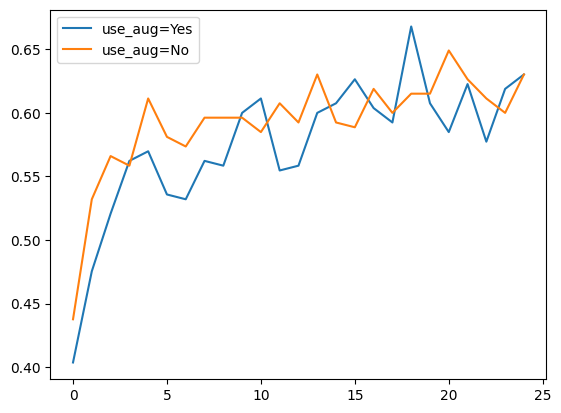

In [61]:
for use_aug, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('use_aug=%s' % use_aug))


plt.legend()

use aug=true



### More experiments

In [64]:
def make_model3_with_base(base_model,learning_rate, size_inner1=None, size_inner2=None, droprate=None, ):
    
 
    base_model.trainable = False
     
    inputs = keras.Input(shape=(224, 224, 3))
    
    base = base_model(inputs, training=False)
    
    vectors = keras.layers.GlobalMaxPooling2D()(base)

    inner1 = keras.layers.Dense(size_inner1, activation='relu')(vectors)
    
    inner2 = keras.layers.Dense(size_inner1, activation='relu')(inner1)   
    
    drop = keras.layers.Dropout(droprate)(inner2)
    
    outputs = keras.layers.Dense(53, activation='softmax')(drop)

    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy()

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model





In [66]:
learning_rate = 0.001
size1 = 1024
size2 = 256
droprate = 0.2 ### zero
epochs=25

preprocess_func=keras.applications.vgg16.preprocess_input
base_model=keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

for size2 in [106,256,512,1024]:
    print(size2)

    train_ds, val_ds= make_datasets_aug_preprocess_func(
                        preprocess_func=preprocess_func,
                        batch_size=32, 
                        rotation_range=10,
                        width_shift_range=0.05,
                        height_shift_range=0.05,
                        shear_range=0.1,
                        zoom_range=0,
                        horizontal_flip=False,
                        vertical_flip=True,
    )    
    
    model = make_model3_with_base(
        base_model=base_model,
        learning_rate=learning_rate,
        size_inner1=size1,
        size_inner2=size2,
        droprate=droprate_vars
    )
    
    history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)
    scores[size2] = history.history  
    

    print()
    print()




106
Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/25
239/239 [==============================] - 34s 139ms/step - loss: 6.2329 - accuracy: 0.1529 - val_loss: 2.7524 - val_accuracy: 0.2566
Epoch 2/25
239/239 [==============================] - 33s 139ms/step - loss: 2.6831 - accuracy: 0.2884 - val_loss: 2.2978 - val_accuracy: 0.3283
Epoch 3/25
239/239 [==============================] - 33s 139ms/step - loss: 2.2667 - accuracy: 0.3725 - val_loss: 2.1399 - val_accuracy: 0.4000
Epoch 4/25
239/239 [==============================] - 33s 138ms/step - loss: 2.0089 - accuracy: 0.4322 - val_loss: 1.8925 - val_accuracy: 0.4453
Epoch 5/25
239/239 [==============================] - 33s 137ms/step - loss: 1.8115 - accuracy: 0.4784 - val_loss: 1.8310 - val_accuracy: 0.4566
Epoch 6/25
239/239 [==============================] - 33s 137ms/step - loss: 1.6423 - accuracy: 0.5270 - val_loss: 1.6836 - val_accuracy: 0.4981
Epoch 7/25
239/239 [=====================

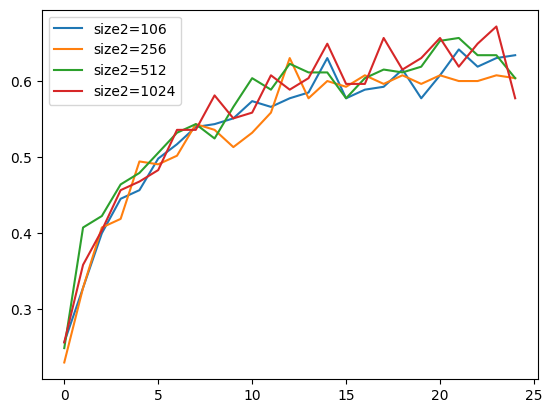

In [75]:
for size2, hist in scores2.items():
    plt.plot(hist['val_accuracy'], label=('size2=%s' % size2))


plt.legend()

№ how about this simple:


In [76]:
train_datagen_s = ImageDataGenerator(rescale=1./255)
valid_datagen_s = ImageDataGenerator(rescale=1./255)
test_datagen_s = ImageDataGenerator(rescale=1./255)

train_data_s = train_datagen_s.flow_from_directory(TRAIN_DIR,
                                               batch_size=32,  
                                               target_size=(224, 224), 
                                               class_mode="categorical", 
                                               seed=42)

valid_data_s = valid_datagen_s.flow_from_directory(VALIDATION_DIR,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

test_data_s = test_datagen_s.flow_from_directory(TEST_DIR,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

model_s = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64, 
                         kernel_size=3,
                         activation='relu',
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(filters=64,
                         activation='relu', 
                         kernel_size=3),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(filters=64,
                         activation='relu', 
                         kernel_size=3),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(53, activation="softmax") 
])


model_s.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_s = model_s.fit(train_data_s,
                        epochs=15,
                        steps_per_epoch=len(train_data_s),
                        validation_data=valid_data_s,
                        validation_steps=len(valid_data_s))



Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/15
239/239 [==============================] - 14s 47ms/step - loss: 2.7787 - accuracy: 0.2743 - val_loss: 1.6875 - val_accuracy: 0.4981
Epoch 2/15
239/239 [==============================] - 11s 44ms/step - loss: 1.5376 - accuracy: 0.5788 - val_loss: 1.0670 - val_accuracy: 0.6981
Epoch 3/15
239/239 [==============================] - 11s 44ms/step - loss: 0.8696 - accuracy: 0.7562 - val_loss: 0.9672 - val_accuracy: 0.7245
Epoch 4/15
239/239 [==============================] - 11s 44ms/step - loss: 0.4087 - accuracy: 0.8847 - val_loss: 1.0755 - val_accuracy: 0.7623
Epoch 5/15
239/239 [==============================] - 11s 45ms/step - loss: 0.2384 - accuracy: 0.9381 - val_loss: 1.1639 - val_accuracy: 0.7811
Epoch 6/15
239/239 [==============================] - 11s 45ms/step - loss: 0.1538 - accuracy: 0.9639 - val_loss: 1.1674 - val_accuracy: 0.7849
Epoch 7/1

AttributeError: 'History' object has no attribute 'history_s'

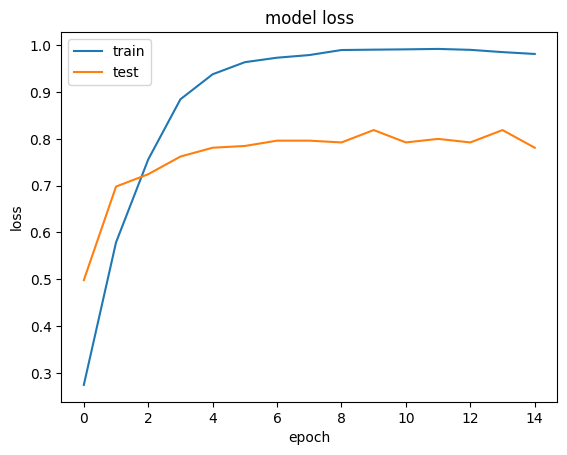

In [77]:
plt.plot(history_s.history['accuracy'])
plt.plot(history_s.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# FANTASTIC ! 

i was going wrong way

Now try to add VGG16 to this code

In [80]:
preprocess_func=keras.applications.vgg16.preprocess_input
base_model=keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)


# Freeze convolutional layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False


# Create a new model by adding custom dense layers on top of the pre-trained model
model3 = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(53, activation="softmax")
])

# Compile the model
model3.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Print model summary to check the architecture
model.summary()

Model: "model_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_80 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_max_pooling2d_6 (Gl  (None, 512)               0         
 obalMaxPooling2D)                                               
                                                                 
 dense_81 (Dense)            (None, 1024)              525312    
                                                                 
 dense_82 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_39 (Dropout)        (None, 1024)              0         
                                                          

In [81]:
history = model3.fit(train_data_s,
                    epochs=15,
                    steps_per_epoch=len(train_data_s),
                    validation_data=valid_data_s,
                    validation_steps=len(valid_data_s))

Epoch 1/15
239/239 [==============================] - 25s 101ms/step - loss: 2.1972 - accuracy: 0.4300 - val_loss: 0.8582 - val_accuracy: 0.7660
Epoch 2/15
239/239 [==============================] - 24s 101ms/step - loss: 0.8589 - accuracy: 0.7534 - val_loss: 0.6924 - val_accuracy: 0.8000
Epoch 3/15
239/239 [==============================] - 24s 102ms/step - loss: 0.4288 - accuracy: 0.8757 - val_loss: 0.4807 - val_accuracy: 0.8453
Epoch 4/15
239/239 [==============================] - 24s 101ms/step - loss: 0.2201 - accuracy: 0.9391 - val_loss: 0.4541 - val_accuracy: 0.8755
Epoch 5/15
239/239 [==============================] - 24s 100ms/step - loss: 0.1311 - accuracy: 0.9645 - val_loss: 0.5287 - val_accuracy: 0.8528
Epoch 6/15
239/239 [==============================] - 24s 100ms/step - loss: 0.1183 - accuracy: 0.9643 - val_loss: 0.5921 - val_accuracy: 0.8189
Epoch 7/15
239/239 [==============================] - 24s 100ms/step - loss: 0.1037 - accuracy: 0.9689 - val_loss: 0.4629 - val_ac

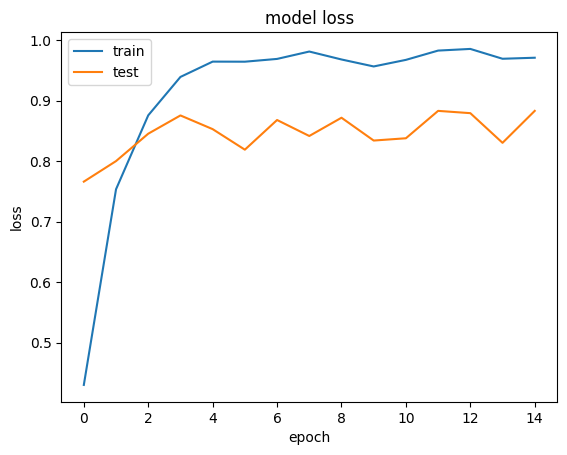

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [107]:
def make_model_v2(learning_rate=0.001,size1=128,size2=128,droprate=None):

    base_model=keras.applications.VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )
    
    # Freeze convolutional layers of the pre-trained model
    for layer in base_model.layers:
        layer.trainable = False
    
    
    # Create a new model by adding custom dense layers on top of the pre-trained model
    if droprate is None:
        model3 = tf.keras.models.Sequential([
            base_model,
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(size1, activation="relu"),
            tf.keras.layers.Dense(size2, activation="relu"),
            tf.keras.layers.Dense(53, activation="softmax")
        ])
    else:
        model3 = tf.keras.models.Sequential([
            base_model,
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(size1, activation="relu"),
            tf.keras.layers.Dense(size2, activation="relu"),
            tf.keras.layers.Dropout(droprate),
            tf.keras.layers.Dense(53, activation="softmax")
        ])

        
        
    # Compile the model
    model3.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=["accuracy"])
    
    return model3

def datasets_v2(aug=False, batch_size=32, 
                                    rotation_range=0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    shear_range=0,
                                    zoom_range=0,
                                    horizontal_flip=False,
                                    vertical_flip=False, ):
    if aug:
        train_datagen_s = ImageDataGenerator(rescale=1./255,
                                                            rotation_range=rotation_range,
                                                            width_shift_range=width_shift_range,
                                                            height_shift_range=height_shift_range,
                                                            shear_range=shear_range,
                                                            zoom_range=zoom_range,
                                                            horizontal_flip=horizontal_flip,
                                                            vertical_flip=vertical_flip,
                                                            fill_mode='nearest')
    else:
        train_datagen_s = ImageDataGenerator(rescale=1./255)
        
    valid_datagen_s = ImageDataGenerator(rescale=1./255)
    test_datagen_s = ImageDataGenerator(rescale=1./255)

    
    train_data_s = train_datagen_s.flow_from_directory(TRAIN_DIR,
                                                       batch_size=batch_size,  
                                                       target_size=(224, 224), 
                                                       class_mode="categorical", 
                                                       seed=42)        
    
    valid_data_s = valid_datagen_s.flow_from_directory(VALIDATION_DIR,
                                                   batch_size=batch_size,
                                                   target_size=(224, 224),
                                                   class_mode="categorical",
                                                   seed=42)
    
    test_data_s = test_datagen_s.flow_from_directory(TEST_DIR,
                                                   batch_size=batch_size,
                                                   target_size=(224, 224),
                                                   class_mode="categorical",
                                                   seed=42)
    return train_data_s, valid_data_s, test_data_s




In [87]:
train_dataset, valid_dataset, test_dataset=datasets_v2(aug=False)


Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


## Doing all again with hyperparams

### Learning rate

In [88]:
epochs=10

scores = {}

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=False)


for learning_rate_var in [0.01, 0.001, 0.0001]:
    print(learning_rate_var)

    model=make_model_v2(learning_rate=learning_rate_var)
    history = model.fit(train_dataset,
                        epochs=epochs,
                        steps_per_epoch=len(train_dataset),
                        validation_data=valid_dataset,
                        validation_steps=len(valid_dataset))   

    
    print()
    print()



Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
0.01
Epoch 1/10
239/239 [==============================] - 25s 101ms/step - loss: 4.1990 - accuracy: 0.0567 - val_loss: 2.9955 - val_accuracy: 0.1208
Epoch 2/10
239/239 [==============================] - 24s 100ms/step - loss: 3.0861 - accuracy: 0.0902 - val_loss: 2.7954 - val_accuracy: 0.1019
Epoch 3/10
239/239 [==============================] - 24s 100ms/step - loss: 2.8984 - accuracy: 0.1114 - val_loss: 2.6858 - val_accuracy: 0.1245
Epoch 4/10
239/239 [==============================] - 24s 100ms/step - loss: 2.8271 - accuracy: 0.1123 - val_loss: 2.6819 - val_accuracy: 0.1321
Epoch 5/10
239/239 [==============================] - 24s 100ms/step - loss: 2.7667 - accuracy: 0.1253 - val_loss: 2.5897 - val_accuracy: 0.1472
Epoch 6/10
239/239 [==============================] - 24s 100ms/step - loss: 2.7376 - accuracy: 0.1291 - val_loss: 2.7279 - val_accuracy: 0.090

In [90]:
learning_rate = 0.001   # is winner


In [92]:
learning_rate = 0.001 
epochs=10

scores = {}

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=False)


for size1 in [64, 128, 256]:
    print('SIZE1=',size1)
    for size2 in [64, 128, 256]:
        print('SIZE2=',size2)
        model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2)
        history = model.fit(train_dataset,
                            epochs=epochs,
                            steps_per_epoch=len(train_dataset),
                            validation_data=valid_dataset,
                            validation_steps=len(valid_dataset))   
        scores[f's1={str(size1)},s2={str(size2)}']=history.history 
        
        print()
        print()



Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
SIZE1= 64
SIZE2= 64
Epoch 1/10
239/239 [==============================] - 26s 105ms/step - loss: 2.7806 - accuracy: 0.2625 - val_loss: 1.4464 - val_accuracy: 0.5434
Epoch 2/10
239/239 [==============================] - 25s 105ms/step - loss: 1.3415 - accuracy: 0.6251 - val_loss: 0.8855 - val_accuracy: 0.7283
Epoch 3/10
239/239 [==============================] - 25s 106ms/step - loss: 0.8242 - accuracy: 0.7614 - val_loss: 0.7167 - val_accuracy: 0.7849
Epoch 4/10
239/239 [==============================] - 26s 108ms/step - loss: 0.5331 - accuracy: 0.8452 - val_loss: 0.5379 - val_accuracy: 0.8151
Epoch 5/10
239/239 [==============================] - 26s 108ms/step - loss: 0.3479 - accuracy: 0.9066 - val_loss: 0.5763 - val_accuracy: 0.8226
Epoch 6/10
239/239 [==============================] - 25s 106ms/step - loss: 0.2203 - accuracy: 0.9416 - val_loss: 0.5793 - val_

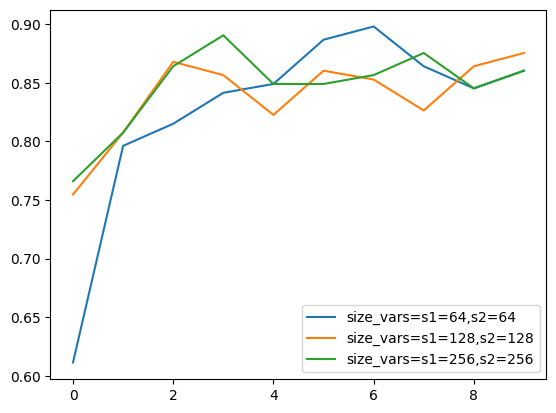

In [93]:
for size_vars, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('size_vars=%s' % size_vars))


plt.legend()

In [94]:
learning_rate = 0.001 
epochs=10
size1=128
scores = {}

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=False)

print('SIZE1=',size1)
for size2 in [32, 64, 128, 256,512]:
    print('SIZE2=',size2)
    model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2)
    history = model.fit(train_dataset,
                        epochs=epochs,
                        steps_per_epoch=len(train_dataset),
                        validation_data=valid_dataset,
                        validation_steps=len(valid_dataset))   
    scores[f's1={str(size1)},s2={str(size2)}']=history.history 
    
    print()
    print()



Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
SIZE1= 128
SIZE2= 32
Epoch 1/10
239/239 [==============================] - 25s 99ms/step - loss: 3.2908 - accuracy: 0.1566 - val_loss: 2.1029 - val_accuracy: 0.3887
Epoch 2/10
239/239 [==============================] - 24s 98ms/step - loss: 1.7350 - accuracy: 0.5349 - val_loss: 1.1592 - val_accuracy: 0.6491
Epoch 3/10
239/239 [==============================] - 24s 98ms/step - loss: 1.0241 - accuracy: 0.7238 - val_loss: 0.7959 - val_accuracy: 0.7774
Epoch 4/10
239/239 [==============================] - 24s 99ms/step - loss: 0.6638 - accuracy: 0.8208 - val_loss: 0.7353 - val_accuracy: 0.7925
Epoch 5/10
239/239 [==============================] - 24s 99ms/step - loss: 0.4435 - accuracy: 0.8818 - val_loss: 0.6682 - val_accuracy: 0.8226
Epoch 6/10
239/239 [==============================] - 23s 98ms/step - loss: 0.2921 - accuracy: 0.9297 - val_loss: 0.6323 - val_accur

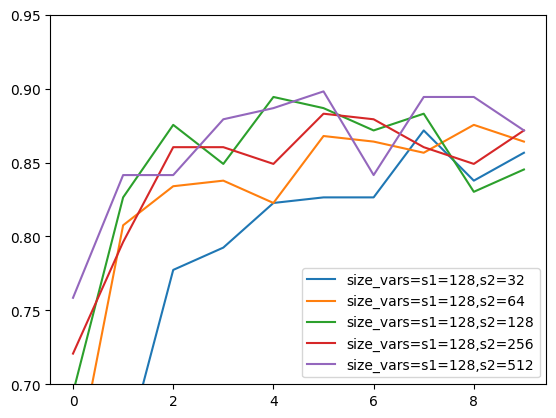

In [96]:
for size_vars, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('size_vars=%s' % size_vars))
    
plt.ylim(0.7, 0.95)
plt.legend()

# Checkpointing

seem like reaching to 0.9 in accuracy
So now is the time to do checkpointing

In [97]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'cardmodel_v2_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

# history = model.fit(
#     train_ds,
#     epochs=10,
#     validation_data=val_ds,
#     callbacks=[chechpoint]       ##  <- add this line
# )

i will run previous comparision between s2=128 and 512 with checkpointing and more ephochs

In [98]:
learning_rate = 0.001 
epochs=15
size1=128
scores = {}

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=False)

print('SIZE1=',size1)
for size2 in [128,256,512]:
    print('SIZE2=',size2)
    model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2)
    history = model.fit(train_dataset,
                        epochs=epochs,
                        steps_per_epoch=len(train_dataset),
                        validation_data=valid_dataset,
                        validation_steps=len(valid_dataset),
                        callbacks=[chechpoint] )   
    scores[f's1={str(size1)},s2={str(size2)}']=history.history 
    
    print()
    print()


Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
SIZE1= 128
SIZE2= 128
Epoch 1/15
239/239 [==============================] - 24s 98ms/step - loss: 2.2146 - accuracy: 0.4279 - val_loss: 0.9646 - val_accuracy: 0.7057
Epoch 2/15


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


239/239 [==============================] - 23s 98ms/step - loss: 0.8931 - accuracy: 0.7476 - val_loss: 0.6226 - val_accuracy: 0.8226
Epoch 3/15
239/239 [==============================] - 24s 99ms/step - loss: 0.4542 - accuracy: 0.8690 - val_loss: 0.4181 - val_accuracy: 0.8830
Epoch 4/15
239/239 [==============================] - 24s 98ms/step - loss: 0.2208 - accuracy: 0.9402 - val_loss: 0.4491 - val_accuracy: 0.8679
Epoch 5/15
239/239 [==============================] - 23s 98ms/step - loss: 0.1348 - accuracy: 0.9643 - val_loss: 0.3745 - val_accuracy: 0.8868
Epoch 6/15
239/239 [==============================] - 23s 98ms/step - loss: 0.1194 - accuracy: 0.9646 - val_loss: 0.4220 - val_accuracy: 0.8755
Epoch 7/15
239/239 [==============================] - 23s 98ms/step - loss: 0.0803 - accuracy: 0.9772 - val_loss: 0.4255 - val_accuracy: 0.8868
Epoch 8/15
239/239 [==============================] - 23s 98ms/step - loss: 0.0680 - accuracy: 0.9818 - val_loss: 0.5953 - val_accuracy: 0.8377
Epo

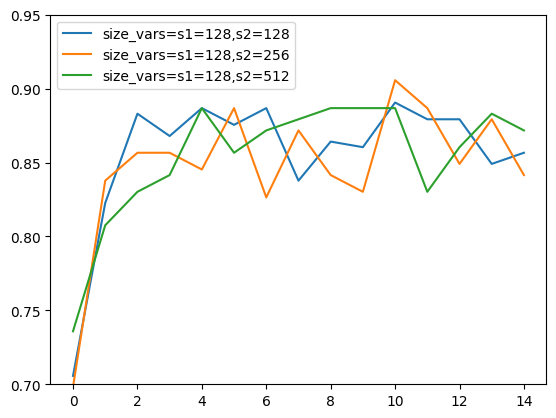

In [99]:
for size_vars, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('size_vars=%s' % size_vars))
    
plt.ylim(0.7, 0.95)
plt.legend()

## Ajusting dropout

In [101]:
scores

{'s1=128,s2=128': {'loss': [2.214620590209961,
   0.8931232690811157,
   0.45418205857276917,
   0.2207789123058319,
   0.13477082550525665,
   0.11935136467218399,
   0.08030067384243011,
   0.06803444772958755,
   0.11821518838405609,
   0.1315479725599289,
   0.10531960427761078,
   0.04720810800790787,
   0.06798014789819717,
   0.07400299608707428,
   0.08030898123979568],
  'accuracy': [0.4278593957424164,
   0.7476390600204468,
   0.8689664006233215,
   0.9401888847351074,
   0.9643231630325317,
   0.964585542678833,
   0.9771773219108582,
   0.9817680716514587,
   0.9614375829696655,
   0.9576337933540344,
   0.9689139723777771,
   0.9868835210800171,
   0.9773085117340088,
   0.976783812046051,
   0.9752098917961121],
  'val_loss': [0.9646050930023193,
   0.6225706934928894,
   0.41810446977615356,
   0.4490799903869629,
   0.3744811415672302,
   0.4219701886177063,
   0.42554470896720886,
   0.5953163504600525,
   0.5761948227882385,
   0.5828619003295898,
   0.42074984312057

In [102]:
old_score_for_drop0=scores['s1=128,s2=256']

In [103]:
old_score_for_drop0

{'loss': [2.1044156551361084,
  0.867579460144043,
  0.4480654299259186,
  0.22640691697597504,
  0.15447376668453217,
  0.12493970990180969,
  0.1165744811296463,
  0.12422119826078415,
  0.11656799912452698,
  0.09939251840114594,
  0.06314540654420853,
  0.09378370642662048,
  0.07941993325948715,
  0.0721016600728035,
  0.0742386057972908],
 'accuracy': [0.43323713541030884,
  0.7429171204566956,
  0.8642445206642151,
  0.929695725440979,
  0.9534364938735962,
  0.9602570533752441,
  0.9636673927307129,
  0.9620934128761292,
  0.9623557329177856,
  0.9666841626167297,
  0.9817680716514587,
  0.9689139723777771,
  0.9737670421600342,
  0.9775708317756653,
  0.9769150018692017],
 'val_loss': [0.9390633702278137,
  0.5594164133071899,
  0.39658433198928833,
  0.5211410522460938,
  0.4852827489376068,
  0.38315916061401367,
  0.6547523736953735,
  0.44229528307914734,
  0.5642990469932556,
  0.6408150792121887,
  0.3991672098636627,
  0.4942510724067688,
  0.6944373250007629,
  0.65800

In [108]:
learning_rate = 0.001 
epochs=15
size1=128
size2=256
scores = {}

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=False)


for droprate in [0.0,0.1,0.2,0.5]:
    if droprate==0.0:
        print('DROP=',droprate)
        scores[droprate]=old_score_for_drop0
    else:
        print('DROP=',droprate)
        model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=droprate)
        history = model.fit(train_dataset,
                            epochs=epochs,
                            steps_per_epoch=len(train_dataset),
                            validation_data=valid_dataset,
                            validation_steps=len(valid_dataset),
                            callbacks=[chechpoint] )   
        scores[droprate]=history.history 
        
        print()
        print()


Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
DROP= 0.0
DROP= 0.1
Epoch 1/15
239/239 [==============================] - 24s 98ms/step - loss: 2.3302 - accuracy: 0.3701 - val_loss: 0.9743 - val_accuracy: 0.6943
Epoch 2/15
239/239 [==============================] - 23s 98ms/step - loss: 1.0225 - accuracy: 0.6981 - val_loss: 0.6768 - val_accuracy: 0.8075
Epoch 3/15
239/239 [==============================] - 23s 98ms/step - loss: 0.5915 - accuracy: 0.8190 - val_loss: 0.4797 - val_accuracy: 0.8566
Epoch 4/15
239/239 [==============================] - 23s 98ms/step - loss: 0.3577 - accuracy: 0.8865 - val_loss: 0.5427 - val_accuracy: 0.8264
Epoch 5/15
239/239 [==============================] - 23s 98ms/step - loss: 0.1980 - accuracy: 0.9353 - val_loss: 0.4874 - val_accuracy: 0.8566
Epoch 6/15
239/239 [==============================] - 23s 98ms/step - loss: 0.1502 - accuracy: 0.9524 - val_loss: 0.4590 - val_accura

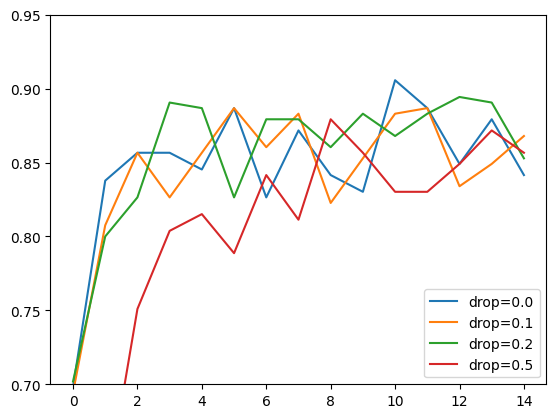

In [109]:
for drop, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('drop=%s' % drop))
    
plt.ylim(0.7, 0.95)
plt.legend()

We don't need dropout

## Ajusting agumentarion

First thing to do is try values that I have got before

In [111]:
learning_rate = 0.001 
epochs=30
size1=128
size2=256
scores = {}

for aug in ['Yes', 'No']:
    print('AUG=',aug)
    if not aug:
        train_dataset, valid_dataset, test_dataset=datasets_v2(aug=False)
    else:
        train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                        rotation_range=10,
                        width_shift_range=0.05,
                        height_shift_range=0.05,
                        shear_range=0.1,
                        zoom_range=0,
                        horizontal_flip=False,
                        vertical_flip=True )
        
    model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=None)
    
    history = model.fit(train_dataset,
                        epochs=epochs,
                        steps_per_epoch=len(train_dataset),
                        validation_data=valid_dataset,
                        validation_steps=len(valid_dataset),
                        callbacks=[chechpoint] )   
    
    scores[aug]=history.history 
    print()
    print()


AUG= Yes
Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/30
239/239 [==============================] - 34s 138ms/step - loss: 2.4656 - accuracy: 0.3304 - val_loss: 1.2714 - val_accuracy: 0.6189
Epoch 2/30
239/239 [==============================] - 33s 138ms/step - loss: 1.3818 - accuracy: 0.6040 - val_loss: 0.9045 - val_accuracy: 0.7396
Epoch 3/30
239/239 [==============================] - 34s 141ms/step - loss: 1.0352 - accuracy: 0.6899 - val_loss: 0.7473 - val_accuracy: 0.7811
Epoch 4/30
239/239 [==============================] - 33s 139ms/step - loss: 0.8615 - accuracy: 0.7404 - val_loss: 0.6370 - val_accuracy: 0.8075
Epoch 5/30
239/239 [==============================] - 33s 137ms/step - loss: 0.7508 - accuracy: 0.7733 - val_loss: 0.5886 - val_accuracy: 0.8189
Epoch 6/30
239/239 [==============================] - 33s 138ms/step - loss: 0.6589 - accuracy: 0.7939 - val_loss: 0.5887 - val_accuracy: 0

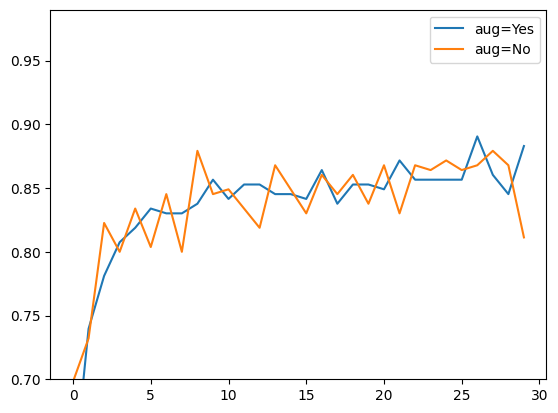

In [112]:
for aug, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('aug=%s' % aug))
    
plt.ylim(0.7, 0.99)
plt.legend()

## Epermients with augmentation

In [113]:
old_s=scores['Yes']

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/30
239/239 [==============================] - 37s 150ms/step - loss: 3.0412 - accuracy: 0.1608 - val_loss: 2.1342 - val_accuracy: 0.2792
Epoch 2/30
239/239 [==============================] - 36s 150ms/step - loss: 2.2836 - accuracy: 0.2977 - val_loss: 1.6023 - val_accuracy: 0.4830
Epoch 3/30
239/239 [==============================] - 36s 149ms/step - loss: 2.0518 - accuracy: 0.3721 - val_loss: 1.4311 - val_accuracy: 0.5245
Epoch 4/30
239/239 [==============================] - 36s 148ms/step - loss: 1.9533 - accuracy: 0.4111 - val_loss: 1.3146 - val_accuracy: 0.5925
Epoch 5/30
239/239 [==============================] - 36s 151ms/step - loss: 1.8105 - accuracy: 0.4441 - val_loss: 1.3977 - val_accuracy: 0.5170
Epoch 6/30
239/239 [==============================] - 37s 154ms/step - loss: 1.7691 - accuracy: 0.4582 - val_loss: 1.3042 - val_accuracy: 0.5887
Epo

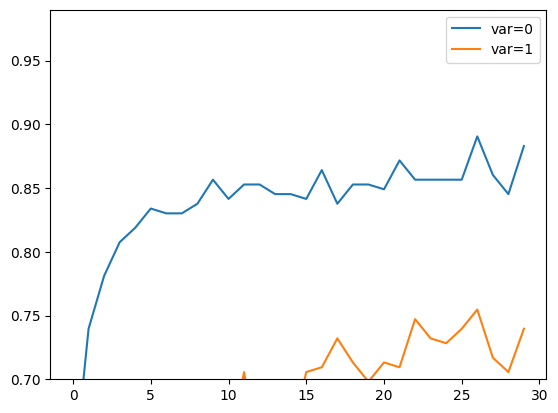

In [115]:
learning_rate = 0.001 
epochs=30
size1=128
size2=256
scores = {}
scores[0]=old_s

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                rotation_range=25,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.05,
                zoom_range=0.25,
                horizontal_flip=False,
                vertical_flip=True )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=None)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores[1]=history.history 
print()
print()

for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.7, 0.99)
plt.legend()

In [ ]:
for rotation_range, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('rotation_range=%s' % rotation_range))
    
plt.ylim(0.7, 0.99)
plt.legend()

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/15
239/239 [==============================] - 35s 144ms/step - loss: 2.7607 - accuracy: 0.2382 - val_loss: 1.5485 - val_accuracy: 0.5057
Epoch 2/15
239/239 [==============================] - 35s 144ms/step - loss: 1.8308 - accuracy: 0.4566 - val_loss: 1.2444 - val_accuracy: 0.6038
Epoch 3/15
239/239 [==============================] - 35s 144ms/step - loss: 1.5829 - accuracy: 0.5346 - val_loss: 0.9929 - val_accuracy: 0.6981
Epoch 4/15
239/239 [==============================] - 35s 145ms/step - loss: 1.4146 - accuracy: 0.5860 - val_loss: 1.0061 - val_accuracy: 0.6943
Epoch 5/15
239/239 [==============================] - 34s 143ms/step - loss: 1.2750 - accuracy: 0.6207 - val_loss: 0.8029 - val_accuracy: 0.7547
Epoch 6/15
239/239 [==============================] - 35s 144ms/step - loss: 1.2062 - accuracy: 0.6405 - val_loss: 0.7982 - val_accuracy: 0.7585
Epo

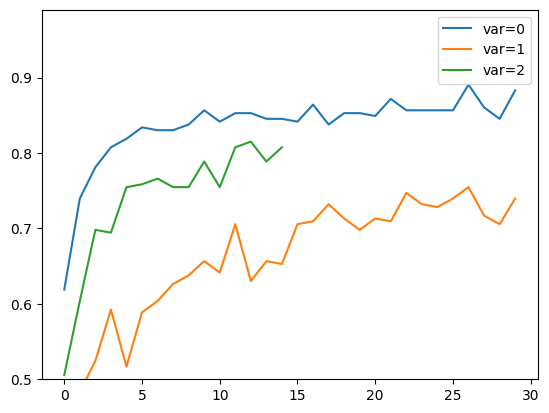

In [116]:
learning_rate = 0.001 
epochs=15
size1=128
size2=256

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                        rotation_range=10,
                        width_shift_range=0.15,
                        height_shift_range=0.15,
                        shear_range=0.1,
                        zoom_range=0,
                        horizontal_flip=False,
                        vertical_flip=True  )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=None)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores[2]=history.history 
print()
print()


for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.5, 0.99)
plt.legend()

In [117]:
history2 = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

Epoch 1/15
239/239 [==============================] - 35s 144ms/step - loss: 0.8460 - accuracy: 0.7433 - val_loss: 0.6565 - val_accuracy: 0.8075
Epoch 2/15
239/239 [==============================] - 37s 153ms/step - loss: 0.8234 - accuracy: 0.7476 - val_loss: 0.6589 - val_accuracy: 0.7887
Epoch 3/15
239/239 [==============================] - 35s 147ms/step - loss: 0.8306 - accuracy: 0.7493 - val_loss: 0.6557 - val_accuracy: 0.8075
Epoch 4/15
239/239 [==============================] - 35s 146ms/step - loss: 0.7886 - accuracy: 0.7598 - val_loss: 0.5676 - val_accuracy: 0.8377
Epoch 5/15
239/239 [==============================] - 35s 145ms/step - loss: 0.7859 - accuracy: 0.7539 - val_loss: 0.6991 - val_accuracy: 0.7962
Epoch 6/15
239/239 [==============================] - 35s 147ms/step - loss: 0.7759 - accuracy: 0.7625 - val_loss: 0.6219 - val_accuracy: 0.8302
Epoch 7/15
239/239 [==============================] - 35s 145ms/step - loss: 0.7422 - accuracy: 0.7743 - val_loss: 0.5808 - val_ac

In [119]:
history2.history

{'loss': [0.846036434173584,
  0.8234341740608215,
  0.830597460269928,
  0.7886063456535339,
  0.7859131097793579,
  0.7759233713150024,
  0.742222785949707,
  0.7785530686378479,
  0.7201679348945618,
  0.7294923067092896,
  0.6912264227867126,
  0.6889376044273376,
  0.689471423625946,
  0.6682640910148621,
  0.6470814347267151],
 'accuracy': [0.7433105707168579,
  0.7476390600204468,
  0.7493441700935364,
  0.7598373293876648,
  0.753934919834137,
  0.7624606490135193,
  0.774265468120575,
  0.7576075792312622,
  0.7804301977157593,
  0.7757083177566528,
  0.7875131368637085,
  0.7842339873313904,
  0.7859391570091248,
  0.7944648265838623,
  0.7957764863967896],
 'val_loss': [0.6565174460411072,
  0.6588529944419861,
  0.6556859016418457,
  0.5676449537277222,
  0.699120819568634,
  0.6219443678855896,
  0.5808137655258179,
  0.6823192834854126,
  0.595637857913971,
  0.6748145818710327,
  0.6563379168510437,
  0.6370778679847717,
  0.6547253727912903,
  0.6725385785102844,
  0.61

In [120]:
scores[2]['loss']+=history2.history['loss']
scores[2]['accuracy']+=history2.history['accuracy']
scores[2]['val_loss']+=history2.history['val_loss']
scores[2]['val_accuracy']+=history2.history['val_accuracy']

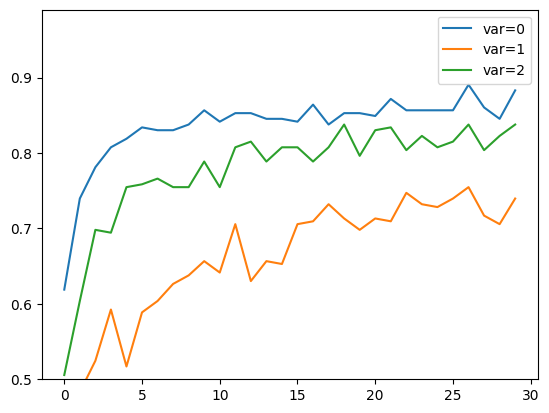

In [121]:
for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.5, 0.99)
plt.legend()

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/20
239/239 [==============================] - 36s 147ms/step - loss: 2.5498 - accuracy: 0.3033 - val_loss: 1.3091 - val_accuracy: 0.6226
Epoch 2/20
239/239 [==============================] - 34s 144ms/step - loss: 1.4142 - accuracy: 0.5937 - val_loss: 0.8316 - val_accuracy: 0.7321
Epoch 3/20
239/239 [==============================] - 35s 148ms/step - loss: 1.0885 - accuracy: 0.6798 - val_loss: 0.6309 - val_accuracy: 0.8075
Epoch 4/20
239/239 [==============================] - 35s 144ms/step - loss: 0.8907 - accuracy: 0.7345 - val_loss: 0.5778 - val_accuracy: 0.8264
Epoch 5/20
239/239 [==============================] - 35s 144ms/step - loss: 0.7933 - accuracy: 0.7566 - val_loss: 0.5363 - val_accuracy: 0.8151
Epoch 6/20
239/239 [==============================] - 35s 147ms/step - loss: 0.6920 - accuracy: 0.7901 - val_loss: 0.4768 - val_accuracy: 0.8453
Epo

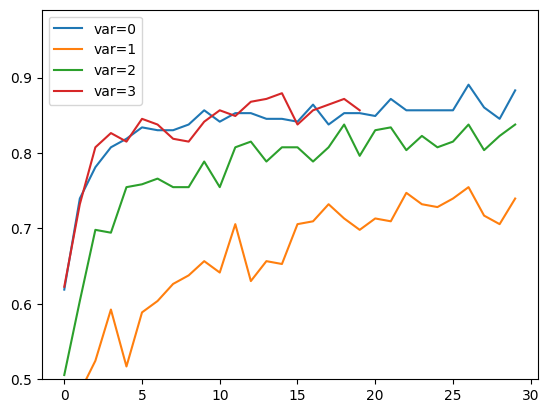

In [122]:
learning_rate = 0.001 
epochs=20
size1=128
size2=256

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                        rotation_range=10,
                        width_shift_range=0.10,
                        height_shift_range=0.10,
                        shear_range=0,
                        zoom_range=0.1,
                        horizontal_flip=False,
                        vertical_flip=False  )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=None)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores[3]=history.history 
print()
print()


for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.5, 0.99)
plt.legend()

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/20
239/239 [==============================] - 36s 145ms/step - loss: 2.6916 - accuracy: 0.2694 - val_loss: 1.3549 - val_accuracy: 0.6000
Epoch 2/20
239/239 [==============================] - 35s 147ms/step - loss: 1.5868 - accuracy: 0.5405 - val_loss: 0.9088 - val_accuracy: 0.7094
Epoch 3/20
239/239 [==============================] - 35s 147ms/step - loss: 1.2935 - accuracy: 0.6186 - val_loss: 0.6624 - val_accuracy: 0.8113
Epoch 4/20
239/239 [==============================] - 35s 148ms/step - loss: 1.1162 - accuracy: 0.6695 - val_loss: 0.6121 - val_accuracy: 0.8113
Epoch 5/20
239/239 [==============================] - 35s 146ms/step - loss: 0.9815 - accuracy: 0.7049 - val_loss: 0.6613 - val_accuracy: 0.7962
Epoch 6/20
239/239 [==============================] - 35s 144ms/step - loss: 0.9049 - accuracy: 0.7243 - val_loss: 0.6284 - val_accuracy: 0.8113
Epo

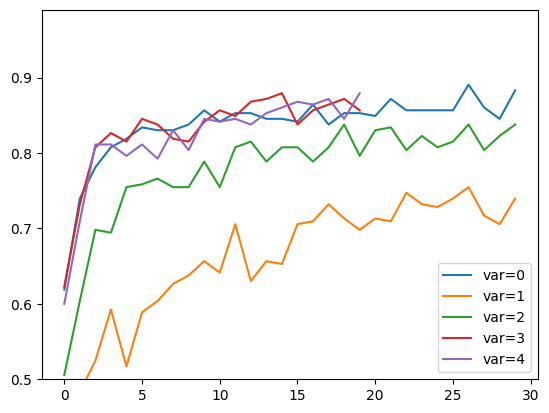

In [124]:
learning_rate = 0.001 
epochs=20
size1=128
size2=256

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                        rotation_range=20,
                        width_shift_range=0.10,
                        height_shift_range=0.10,
                        shear_range=0,
                        zoom_range=0.1,
                        horizontal_flip=False,
                        vertical_flip=False  )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=None)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores[4]=history.history 
print()
print()


for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.5, 0.99)
plt.legend()

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/30
239/239 [==============================] - 36s 146ms/step - loss: 2.5802 - accuracy: 0.3071 - val_loss: 1.2443 - val_accuracy: 0.6340
Epoch 2/30
239/239 [==============================] - 35s 145ms/step - loss: 1.5066 - accuracy: 0.5630 - val_loss: 0.8839 - val_accuracy: 0.7208
Epoch 3/30
239/239 [==============================] - 34s 143ms/step - loss: 1.2113 - accuracy: 0.6498 - val_loss: 0.6711 - val_accuracy: 0.8151
Epoch 4/30
239/239 [==============================] - 34s 142ms/step - loss: 1.0386 - accuracy: 0.6932 - val_loss: 0.6972 - val_accuracy: 0.7962
Epoch 5/30
239/239 [==============================] - 34s 142ms/step - loss: 0.9235 - accuracy: 0.7240 - val_loss: 0.6230 - val_accuracy: 0.8189
Epoch 6/30
239/239 [==============================] - 35s 144ms/step - loss: 0.8396 - accuracy: 0.7465 - val_loss: 0.5791 - val_accuracy: 0.8302
Epo

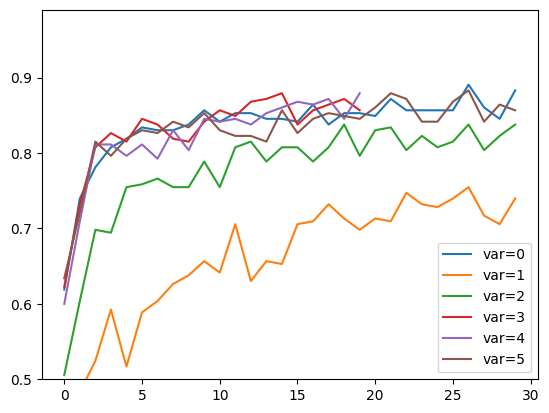

In [125]:
learning_rate = 0.001 
epochs=30
size1=128
size2=256

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                        rotation_range=15,
                        width_shift_range=0.10,
                        height_shift_range=0.10,
                        shear_range=0,
                        zoom_range=0.15,
                        horizontal_flip=False,
                        vertical_flip=False  )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=None)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores[5]=history.history 
print()
print()


for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.5, 0.99)
plt.legend()

In [126]:
del scores[5]

In [127]:
del scores[4]

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/20
239/239 [==============================] - 36s 147ms/step - loss: 2.6304 - accuracy: 0.2795 - val_loss: 1.3333 - val_accuracy: 0.5585
Epoch 2/20
239/239 [==============================] - 36s 150ms/step - loss: 1.6355 - accuracy: 0.5286 - val_loss: 0.8463 - val_accuracy: 0.7698
Epoch 3/20
239/239 [==============================] - 36s 150ms/step - loss: 1.3529 - accuracy: 0.6023 - val_loss: 0.8384 - val_accuracy: 0.7547
Epoch 4/20
239/239 [==============================] - 35s 147ms/step - loss: 1.1835 - accuracy: 0.6472 - val_loss: 0.7687 - val_accuracy: 0.7774
Epoch 5/20
239/239 [==============================] - 36s 148ms/step - loss: 1.0184 - accuracy: 0.6991 - val_loss: 0.6623 - val_accuracy: 0.8038
Epoch 6/20
239/239 [==============================] - 36s 151ms/step - loss: 0.9305 - accuracy: 0.7160 - val_loss: 0.5879 - val_accuracy: 0.8151
Epo

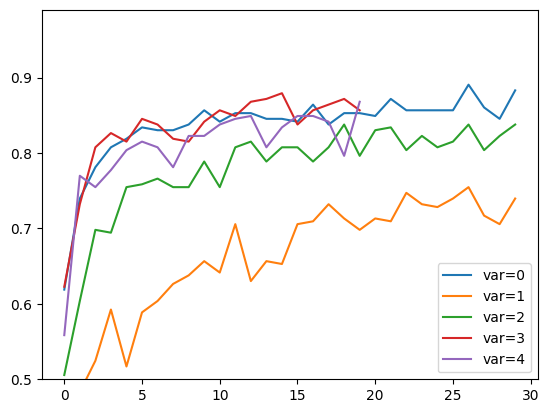

In [128]:
learning_rate = 0.001 
epochs=20
size1=128
size2=256

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                        rotation_range=10,
                        width_shift_range=0.15,
                        height_shift_range=0.15,
                        shear_range=0,
                        zoom_range=0.1,
                        horizontal_flip=False,
                        vertical_flip=False  )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=None)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores[4]=history.history 
print()
print()


for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.5, 0.99)
plt.legend()

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/20
239/239 [==============================] - 35s 144ms/step - loss: 2.5056 - accuracy: 0.3107 - val_loss: 1.1835 - val_accuracy: 0.6340
Epoch 2/20
239/239 [==============================] - 35s 145ms/step - loss: 1.4303 - accuracy: 0.5834 - val_loss: 0.7933 - val_accuracy: 0.7774
Epoch 3/20
239/239 [==============================] - 35s 144ms/step - loss: 1.0641 - accuracy: 0.6794 - val_loss: 0.6026 - val_accuracy: 0.7962
Epoch 4/20
239/239 [==============================] - 34s 144ms/step - loss: 0.8650 - accuracy: 0.7358 - val_loss: 0.5854 - val_accuracy: 0.8302
Epoch 5/20
239/239 [==============================] - 35s 145ms/step - loss: 0.7801 - accuracy: 0.7681 - val_loss: 0.6675 - val_accuracy: 0.8038
Epoch 6/20
239/239 [==============================] - 34s 142ms/step - loss: 0.6798 - accuracy: 0.7890 - val_loss: 0.5955 - val_accuracy: 0.8264
Epo

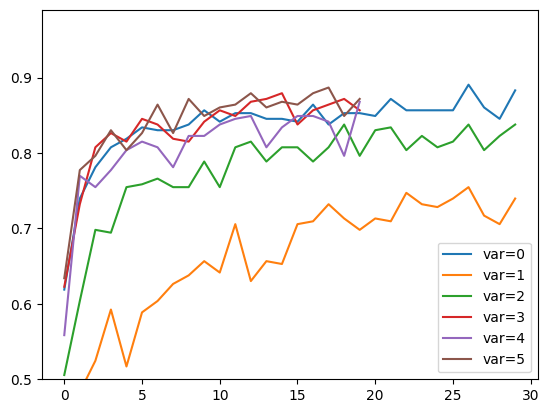

In [129]:
learning_rate = 0.001 
epochs=20
size1=128
size2=256

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                        rotation_range=5,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        shear_range=0,
                        zoom_range=0.1,
                        horizontal_flip=False,
                        vertical_flip=False  )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=None)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores[5]=history.history 
print()
print()


for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.5, 0.99)
plt.legend()

In [130]:
del scores[1]
del scores[2]
del scores[4]



Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/20
239/239 [==============================] - 35s 144ms/step - loss: 2.4911 - accuracy: 0.3227 - val_loss: 1.2129 - val_accuracy: 0.6415
Epoch 2/20
239/239 [==============================] - 35s 145ms/step - loss: 1.4276 - accuracy: 0.5902 - val_loss: 0.8420 - val_accuracy: 0.7245
Epoch 3/20
239/239 [==============================] - 35s 145ms/step - loss: 1.1388 - accuracy: 0.6654 - val_loss: 0.6572 - val_accuracy: 0.8189
Epoch 4/20
239/239 [==============================] - 35s 145ms/step - loss: 0.9650 - accuracy: 0.7137 - val_loss: 0.5509 - val_accuracy: 0.8453
Epoch 5/20
239/239 [==============================] - 35s 144ms/step - loss: 0.8411 - accuracy: 0.7490 - val_loss: 0.5361 - val_accuracy: 0.8415
Epoch 6/20
239/239 [==============================] - 35s 144ms/step - loss: 0.7342 - accuracy: 0.7768 - val_loss: 0.5963 - val_accuracy: 0.8226
Epo

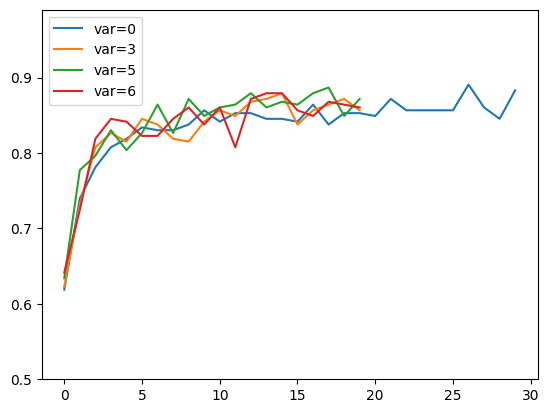

In [131]:
learning_rate = 0.001 
epochs=20
size1=128
size2=256

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                        rotation_range=5,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        shear_range=0,
                        zoom_range=0.2,
                        horizontal_flip=False,
                        vertical_flip=False  )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=None)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores[6]=history.history 
print()
print()




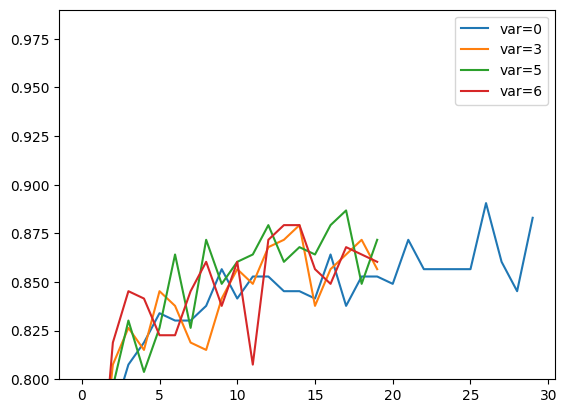

In [132]:
for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.8, 0.99)
plt.legend()

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/20
239/239 [==============================] - 36s 147ms/step - loss: 2.4780 - accuracy: 0.3165 - val_loss: 1.2409 - val_accuracy: 0.6151
Epoch 2/20
239/239 [==============================] - 35s 145ms/step - loss: 1.3850 - accuracy: 0.5927 - val_loss: 0.7236 - val_accuracy: 0.7736
Epoch 3/20
239/239 [==============================] - 35s 146ms/step - loss: 1.0194 - accuracy: 0.7042 - val_loss: 0.7621 - val_accuracy: 0.7774
Epoch 4/20
239/239 [==============================] - 35s 147ms/step - loss: 0.8486 - accuracy: 0.7411 - val_loss: 0.6619 - val_accuracy: 0.8377
Epoch 5/20
239/239 [==============================] - 35s 146ms/step - loss: 0.7047 - accuracy: 0.7832 - val_loss: 0.5647 - val_accuracy: 0.8113
Epoch 6/20
239/239 [==============================] - 35s 147ms/step - loss: 0.6058 - accuracy: 0.8124 - val_loss: 0.4891 - val_accuracy: 0.8642
Epo

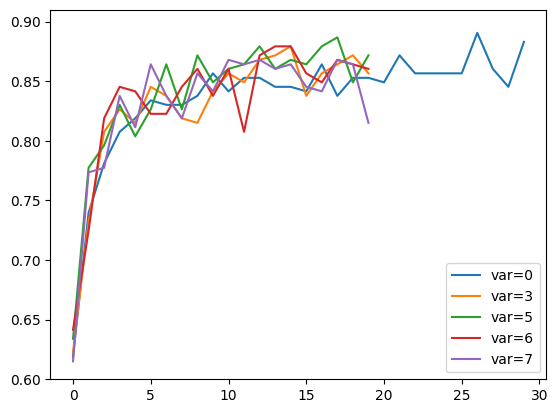

In [133]:
learning_rate = 0.001 
epochs=20
size1=128
size2=256

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                        rotation_range=0,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        shear_range=0,
                        zoom_range=0.1,
                        horizontal_flip=False,
                        vertical_flip=False  )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=None)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores[7]=history.history 
print()
print()

for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.6, 0.91)
plt.legend()

In [134]:
del scores[6]
del scores[7]

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/20
239/239 [==============================] - 36s 147ms/step - loss: 2.6070 - accuracy: 0.2888 - val_loss: 1.2669 - val_accuracy: 0.6113
Epoch 2/20
239/239 [==============================] - 34s 143ms/step - loss: 1.4075 - accuracy: 0.5933 - val_loss: 0.8256 - val_accuracy: 0.7396
Epoch 3/20
239/239 [==============================] - 35s 146ms/step - loss: 1.0647 - accuracy: 0.6860 - val_loss: 0.7288 - val_accuracy: 0.7811
Epoch 4/20
239/239 [==============================] - 35s 145ms/step - loss: 0.8627 - accuracy: 0.7462 - val_loss: 0.5802 - val_accuracy: 0.8226
Epoch 5/20
239/239 [==============================] - 35s 147ms/step - loss: 0.7641 - accuracy: 0.7643 - val_loss: 0.6567 - val_accuracy: 0.7849
Epoch 6/20
239/239 [==============================] - 35s 147ms/step - loss: 0.6541 - accuracy: 0.7964 - val_loss: 0.5885 - val_accuracy: 0.8151
Epo

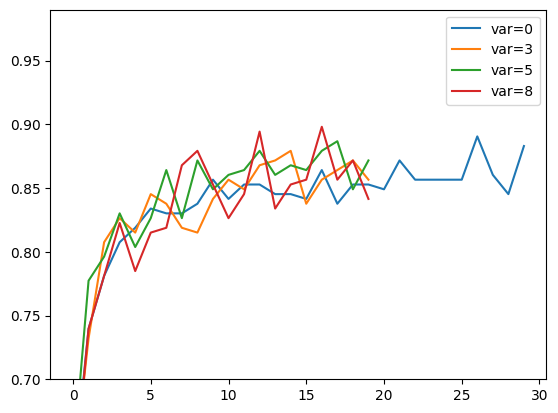

In [135]:
learning_rate = 0.001 
epochs=20
size1=128
size2=256

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                        rotation_range=5,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        shear_range=0.1,
                        zoom_range=0.1,
                        horizontal_flip=False,
                        vertical_flip=False  )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=None)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores[8]=history.history 
print()
print()


for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.7, 0.99)
plt.legend()

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/20
239/239 [==============================] - 36s 147ms/step - loss: 2.5940 - accuracy: 0.2895 - val_loss: 1.4041 - val_accuracy: 0.5434
Epoch 2/20
239/239 [==============================] - 34s 144ms/step - loss: 1.6004 - accuracy: 0.5374 - val_loss: 0.9454 - val_accuracy: 0.7283
Epoch 3/20
239/239 [==============================] - 35s 144ms/step - loss: 1.2898 - accuracy: 0.6212 - val_loss: 0.8222 - val_accuracy: 0.7434
Epoch 4/20
239/239 [==============================] - 35s 144ms/step - loss: 1.1314 - accuracy: 0.6640 - val_loss: 0.8309 - val_accuracy: 0.7358
Epoch 5/20
239/239 [==============================] - 35s 145ms/step - loss: 1.0152 - accuracy: 0.6923 - val_loss: 0.7088 - val_accuracy: 0.7736
Epoch 6/20
239/239 [==============================] - 35s 145ms/step - loss: 0.9178 - accuracy: 0.7185 - val_loss: 0.6174 - val_accuracy: 0.8038
Epo

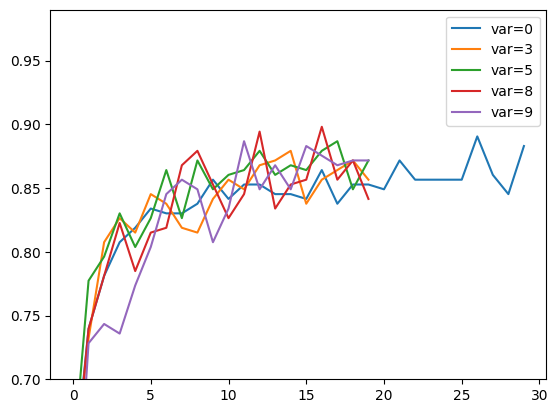

In [136]:
learning_rate = 0.001 
epochs=20
size1=128
size2=256

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                        rotation_range=5,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        shear_range=0.1,
                        zoom_range=0.1,
                        horizontal_flip=False,
                        vertical_flip=True  )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=None)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores[9]=history.history 
print()
print()


for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.7, 0.99)
plt.legend()

## Final test

ok i will take the best with aug, no dropout  (1)
plus best without aug, and dropout=0.2  (2)
plus best with aug and dropout=0.2      (3)

train for 50 epoches and choose the best



In [137]:
scores={}

In [139]:
learning_rate = 0.001 
epochs=50
size1=128
size2=256

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                        rotation_range=5,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        shear_range=0.1,
                        zoom_range=0.1,
                        horizontal_flip=False,
                        vertical_flip=False  )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=None)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores['1 - aug, no dropout']=history.history 
print()
print()



train_dataset, valid_dataset, test_dataset=datasets_v2(aug=False, )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=0.2)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores['2 - no aug, dropout']=history.history 
print()
print()


train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                        rotation_range=5,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        shear_range=0.1,
                        zoom_range=0.1,
                        horizontal_flip=False,
                        vertical_flip=False  )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=0.2)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores['3 - aug, dropout']=history.history 
print()
print()





Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/50
239/239 [==============================] - 36s 145ms/step - loss: 2.4834 - accuracy: 0.3185 - val_loss: 1.2155 - val_accuracy: 0.6038
Epoch 2/50
239/239 [==============================] - 36s 151ms/step - loss: 1.3734 - accuracy: 0.6018 - val_loss: 0.7592 - val_accuracy: 0.7698
Epoch 3/50
239/239 [==============================] - 35s 147ms/step - loss: 1.0429 - accuracy: 0.6906 - val_loss: 0.6191 - val_accuracy: 0.8189
Epoch 4/50
239/239 [==============================] - 35s 146ms/step - loss: 0.8642 - accuracy: 0.7444 - val_loss: 0.5419 - val_accuracy: 0.8340
Epoch 5/50
239/239 [==============================] - 36s 150ms/step - loss: 0.7352 - accuracy: 0.7775 - val_loss: 0.5865 - val_accuracy: 0.8000
Epoch 6/50
239/239 [==============================] - 35s 147ms/step - loss: 0.6625 - accuracy: 0.7977 - val_loss: 0.5850 - val_accuracy: 0.8302
Epo

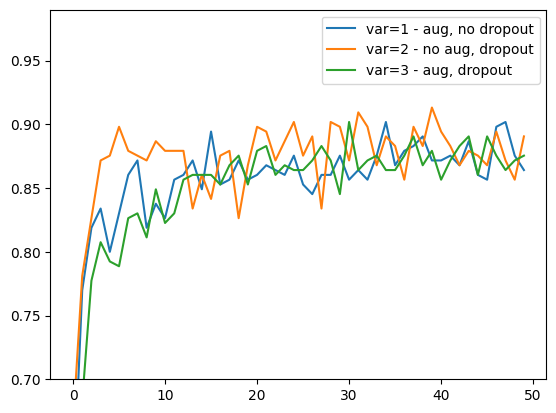

In [140]:
for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.7, 0.99)
plt.legend()

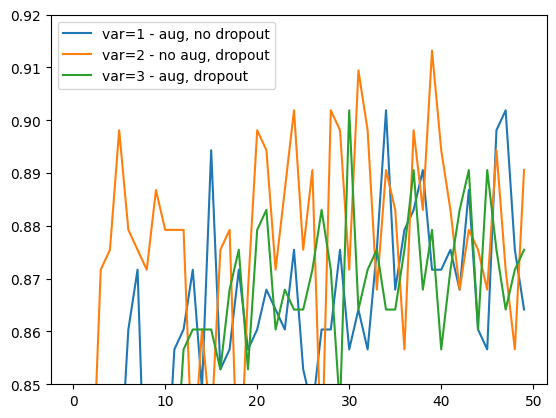

In [141]:
for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.85, 0.92)
plt.legend()

## The winner


The best model is with this params:

lets run the training for 100 epoches

In [142]:

learning_rate = 0.001 
epochs=100
size1=128
size2=256

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=False, )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=0.2)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores_best=history.history 

print()
print()


Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/100
239/239 [==============================] - 25s 99ms/step - loss: 2.4438 - accuracy: 0.3324 - val_loss: 1.0799 - val_accuracy: 0.6566
Epoch 2/100
239/239 [==============================] - 24s 99ms/step - loss: 1.0965 - accuracy: 0.6730 - val_loss: 0.7717 - val_accuracy: 0.7396
Epoch 3/100
239/239 [==============================] - 24s 99ms/step - loss: 0.6540 - accuracy: 0.8025 - val_loss: 0.5456 - val_accuracy: 0.8264
Epoch 4/100
239/239 [==============================] - 24s 99ms/step - loss: 0.4177 - accuracy: 0.8659 - val_loss: 0.5271 - val_accuracy: 0.8528
Epoch 5/100
239/239 [==============================] - 24s 99ms/step - loss: 0.2686 - accuracy: 0.9197 - val_loss: 0.4855 - val_accuracy: 0.8566
Epoch 6/100
239/239 [==============================] - 54s 225ms/step - loss: 0.1852 - accuracy: 0.9425 - val_loss: 0.5723 - val_accuracy: 0.8340
Ep

In [146]:
scores_best.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

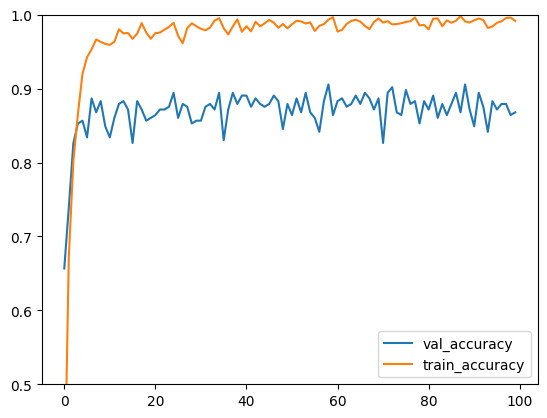

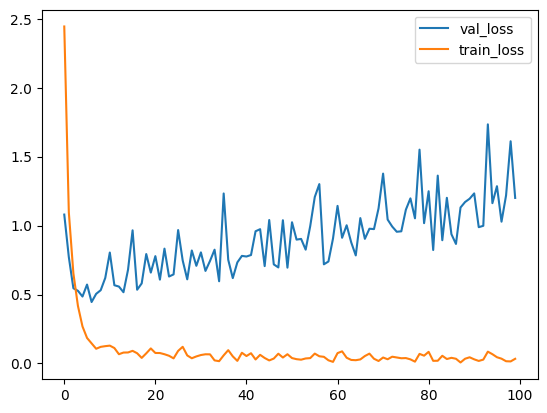

In [148]:
plt.figure()
plt.plot(scores_best['val_accuracy'], label=('val_accuracy'))
plt.plot(scores_best['accuracy'], label=('train_accuracy'))
plt.ylim(0.5, 1)
plt.legend()

plt.figure()
plt.plot(scores_best['val_loss'], label=('val_loss'))
plt.plot(scores_best['loss'], label=('train_loss'))
# plt.ylim(0.5, 0.95)
plt.legend()


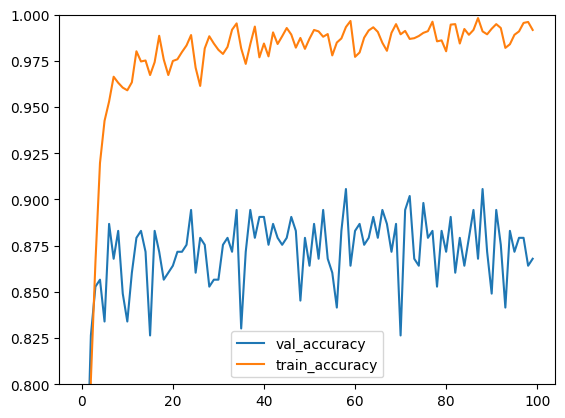

In [149]:
plt.figure()
plt.plot(scores_best['val_accuracy'], label=('val_accuracy'))
plt.plot(scores_best['accuracy'], label=('train_accuracy'))
plt.ylim(0.8, 1)
plt.legend()

# Conclusions

The best model i have got is cardmodel_v2_40_0.913.h5
with validation accuracy 0.913

In [151]:
model.evaluate(test_dataset)    #this is not the very best model, but the latest

9/9 [==============================] - 1s 86ms/step - loss: 2.3526 - accuracy: 0.8075


[2.3526315689086914, 0.8075471520423889]

Follow next files in README to see next steps in the project